## Exploratory Data Analysis - DataCapstone 3

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#import data
players = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/nba_players.csv')
teams = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/nba_teams.csv')
allstar = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/All-Star Selections.csv')

#get data from https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award to add an MVP column to players
mvp = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/nba_mvp.csv')

#get data from https://simple.wikipedia.org/wiki/List_of_NBA_champions to add a championship column to teams
championship = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/nba_championship.csv')

### Feature Glossary
#### Provided by <a href="https://www.sports-reference.com/sharing.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool">Basketball-Reference.com</a>: <a href="https://www.basketball-reference.com/leaders/trb_career.html?sr&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool#nba">View Original Table</a><br>Generated 2/25/2024.

2P - 2-Point Field Goals

2P% - 2-Point Field Goal Percentage; the formula is 2P / 2PA.

2PA - 2-Point Field Goal Attempts

3P - 3-Point Field Goals (available since the 1979-80 season in the NBA)

3P% - 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.

3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

Age - Age; player age on February 1 of the given season.

AST - Assists

AST% - Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.

Award Share - The formula is (award points) / (maximum number of award points). For example, in the 2002-03 MVP voting Tim Duncan had 962 points out of a possible 1190. His MVP award share is 962 / 1190 = 0.81.

BLK - Blocks (available since the 1973-74 season in the NBA)

BLK% - Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.

BPM - Box Plus/Minus (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 possessions that a player contributed above a league-average player, translated to an average team. Please see the article About Box Plus/Minus (BPM) for more information.

DPOY - Defensive Player of the Year

DRB - Defensive Rebounds (available since the 1973-74 season in the NBA)

DRB% - Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.

DRtg - Defensive Rating (available since the 1973-74 season in the NBA); for players and teams it is points allowed per 100 posessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

DWS - Defensive Win Shares; please see the article Calculating Win Shares for more information.

eFG% - Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%).

FG - Field Goals (includes both 2-point field goals and 3-point field goals)

FG% - Field Goal Percentage; the formula is FG / FGA.

FGA - Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)

FT - Free Throws

FT% - Free Throw Percentage; the formula is FT / FTA.

FTA - Free Throw Attempts

Four Factors - Dean Oliver's "Four Factors of Basketball Success"; please see the article Four Factors for more information.

G - Games

GB - Games Behind; the formula is ((first W - W) + (L - first L)) / 2, where first W and first L stand for wins and losses by the first place team, respectively.

GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.).

GS - Games Started (available since the 1982 season)

L - Losses

L Pyth - Pythagorean Losses; the formula is G - W Pyth.

Lg - League

MVP - Most Valuable Player

MP - Minutes Played (available since the 1951-52 season)

MOV - Margin of Victory; the formula is PTS - Opp PTS.

ORtg - Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

Opp - Opponent

ORB - Offensive Rebounds (available since the 1973-74 season in the NBA)

ORB% - Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.

OWS - Offensive Win Shares; please see the article Calculating Win Shares for more information.

Pace - Pace Factor (available since the 1973-74 season in the NBA); the formula is 48 * ((Tm Poss + Opp Poss) / (2 * (Tm MP / 5))). Pace factor is an estimate of the number of possessions per 48 minutes by a team. (Note: 40 minutes is used in the calculation for the WNBA.)

PER - Player Efficiency Rating (available since the 1951-52 season); PER is a rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." Please see the article Calculating PER for more information.

Per 36 Minutes - A statistic (e.g., assists) divided by minutes played, multiplied by 36.

Per Game - A statistic (e.g., assists) divided by games.

PF - Personal Fouls

Poss - Possessions (available since the 1973-74 season in the NBA); the formula for teams is 0.5 * ((Tm FGA + 0.4 * Tm FTA - 1.07 * (Tm ORB / (Tm ORB + Opp DRB)) * (Tm FGA - Tm FG) + Tm TOV) + (Opp FGA + 0.4 * Opp FTA - 1.07 * (Opp ORB / (Opp ORB + Tm DRB)) * (Opp FGA - Opp FG) + Opp TOV)). This formula estimates possessions based on both the team's statistics and their opponent's statistics, then averages them to provide a more stable estimate. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

PProd - Points Produced; Dean Oliver's measure of offensive points produced. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

PTS - Points

ROY - Rookie of the Year

SMOY - Sixth Man of the Year

SOS - Strength of Schedule; a rating of strength of schedule. The rating is denominated in points above/below average, where zero is average. A positive number indicates a harder than average schedule. Doug Drinen, creator of Pro-Football-Reference.com, wrote a thorough explanation of this method.

SRS - Simple Rating System; a rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average. Doug Drinen, creator of Pro-Football-Reference.com wrote a thorough explanation of this method.

STL - Steals (available since the 1973-74 season in the NBA)

STL% - Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.

Stops - Stops; Dean Oliver's measure of individual defensive stops. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

Tm - Team

TOV - Turnovers (available since the 1977-78 season in the NBA)

TOV% - Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.

TRB - Total Rebounds (available since the 1950-51 season)

TRB% - Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.

TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.

Usg% - Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.

VORP - Value Over Replacement Player (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement. Please see the article About Box Plus/Minus (BPM) for more information.

W - Wins

W Pyth - Pythagorean Wins; the formula is G * (Tm PTS14 / (Tm PTS14 + Opp PTS14)). The formula was obtained by fitting a logistic regression model with log(Tm PTS / Opp PTS) as the explanatory variable. Using this formula for all BAA, NBA, and ABA seasons, the root mean-square error (rmse) is 3.14 wins. Using an exponent of 16.5 (a common choice), the rmse is 3.48 wins. (Note: An exponent of 10 is used for the WNBA.)

W-L% - Won-Lost Percentage; the formula is W / (W + L).

WS - Win Shares; an estimate of the number of wins contributed by a player. Please see the article Calculating Win Shares for more information.

WS/48 - Win Shares Per 48 Minutes (available since the 1951-52 season in the NBA); an estimate of the number of wins contributed by the player per 48 minutes (league average is approximately 0.100). Please see the article Calculating Win Shares for more information.

Win Probability - The estimated probability that Team A will defeat Team B in a given matchup.

Year - Year that the season occurred. Since the NBA season is split over two calendar years, the year given is the last year for that season. For example, the year for the 1999-00 season would be 2000.

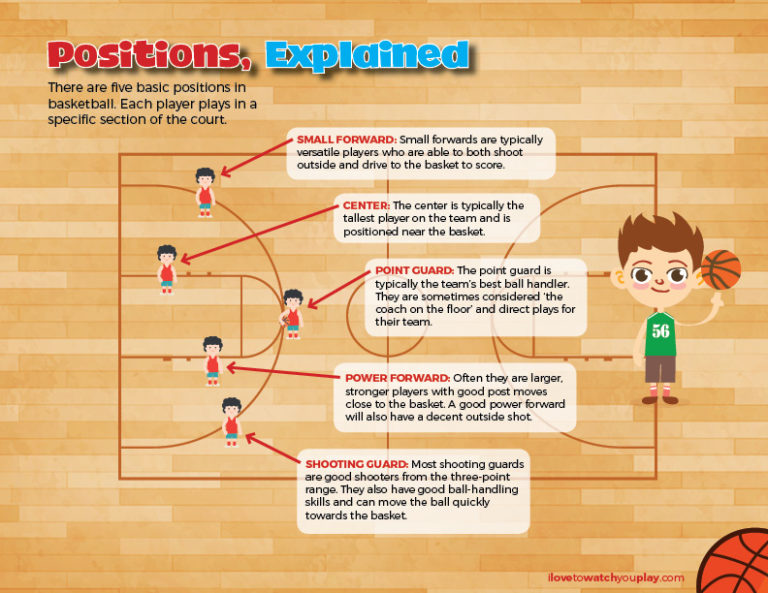

### BASKETBALL POSITIONS
A basketball team can have a lot of players, but only five can play in a game at any one time. Players in a basketball game have assigned basketball positions: center, power forward, small forward, point guard, and shooting guard.

Center

The center is the tallest player on each team, playing near the basket. On offense, the center tries to score on close shots and rebound. But on defense, the center tries to block opponents’ shots and rebound their misses.

Power Forward

The power forward does many of the things a center does, playing near the basket while rebounding and defending taller players. But power forwards also take longer shots than centers.

Small Forward

The small forward plays against small and large players. They roam all over on the court. Small forwards can score from long shots and close ones.

Point Guard

The point guard runs the offense and usually is the team’s best dribbler and passer. The point guard defends the opponent’s point guard and tries to steal the ball.

Shooting Guard

The shooting guard is usually the team’s best shooter. The shooting guard can make shots from long distance and also is a good dribbler.

### Players Dataset EDA

In [3]:
#correct error found during documentation and presentation step for summary value in 'tm' named 'TOT'.
print(players.shape[0])
print(players.loc[players['tm'] == 'TOT'].shape[0])
print(29567-2629) #correct number of rows is 26938
players = players[players['tm'] != 'TOT']
players.shape[0]

29567
2629
26938


26938

In [4]:
#discovered another error with one player. Eddie Johnson's points is not accurate.
players.loc[players['player'] == 'Eddie Johnson', ['player', 'pts', 'tm', 'mp', 'season']]

,player,pts,tm,mp,season
15247,Eddie Johnson,12,HOU,18.0,1999
15781,Eddie Johnson,633,HOU,1490.0,1998
16307,Eddie Johnson,147,IND,306.0,1997
16308,Eddie Johnson,277,HOU,607.0,1997
16880,Eddie Johnson,475,IND,1002.0,1996
17844,Eddie Johnson,836,CHH,1460.0,1994
18318,Eddie Johnson,1177,SEA,1869.0,1993
18760,Eddie Johnson,1386,SEA,2366.0,1992
19215,Eddie Johnson,203,PHO,312.0,1991
19216,Eddie Johnson,1151,SEA,1773.0,1991


In [5]:
#eddie scored 19,202 points in his career from 1981-1999 seasons (starts with 1982 for 1981-1982 season in this dataset.
eddie_johnson = players.loc[players['player'] == 'Eddie Johnson', ['player', 'pts', 'tm', 'mp', 'season']]
eddie_johnson['pts'].sum()

29365

THE PROBLEM IS 2x EDDIE JOHNSON: In 2006, Eddie (Arnet) Johnson was mistaken in multiple media reports for former NBA player Edward (Lee) "Fast Eddie" Johnson (a guard, two-time NBA All-Star, one-time All-Defensive Second Team player, and four years older than Eddie A. Johnson)

In [6]:
#correct the error.  Change rows to reflect 'Eddie L Johnson' and 'Eddie A Johnson'.
index_list_L = [19026, 19371, 19723, 19372, 20063, 20396, 20745, 21090, 21423, 21739, 22067]
elj = players[players.index.isin(index_list_L)]
print("Eddie L Johnson Career Points: ", elj['pts'].sum())
print("Eddie A Johnson Career Points: ", 29365-10163)
elj

Eddie L Johnson Career Points:  8649
Eddie A Johnson Career Points:  19202


,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
19026,13099,1992,2098,Terry Cummings,PF,30.0,10,NBA,SAS,70,...,0.711,247.0,384.0,631.0,102,58.0,34.0,115.0,210,1210
19371,12544,1991,2527,Michael Smith,PF,25.0,2,NBA,BOS,47,...,0.815,21.0,35.0,56.0,43,6.0,2.0,37.0,27,218
19372,12545,1991,2447,Micheal Williams,PG,24.0,3,NBA,IND,73,...,0.879,49.0,127.0,176.0,348,150.0,17.0,150.0,202,813
19723,11996,1990,2248,Joe Dumars,SG,26.0,5,NBA,DET,75,...,0.900,60.0,152.0,212.0,368,63.0,2.0,145.0,129,1335
20063,11439,1989,2052,Craig Hodges,SG,28.0,7,NBA,PHO,10,...,0.750,2.0,3.0,5.0,8,2.0,0.0,5.0,8,39
20396,11772,1989,2038,Tom Chambers,PF,29.0,8,NBA,PHO,81,...,0.851,143.0,541.0,684.0,231,87.0,55.0,231.0,271,2085
20745,11257,1988,2144,Randy Wittman,SG,28.0,5,NBA,ATL,82,...,0.798,39.0,131.0,170.0,302,50.0,18.0,82.0,117,823
21090,10798,1987,1672,Mark Olberding,PF,30.0,12,NBA,SAC,76,...,0.885,50.0,135.0,185.0,91,18.0,9.0,56.0,144,254
21423,10374,1986,2254,Ken Green,PF,26.0,1,NBA,NYK,7,...,0.556,12.0,15.0,27.0,2,4.0,0.0,1.0,8,31
21739,9949,1985,2000,Hank McDowell,PF,25.0,4,NBA,HOU,34,...,0.700,7.0,15.0,22.0,9,3.0,5.0,8.0,22,47


In [7]:
#change Eddie Johnson to Eddie L Johnson for each index to make it clear which Eddie Johnson is being referenced.
for index in index_list_L:
    players.iat[index, 3] = "Eddie L Johnson"
players[players.index.isin(index_list_L)]

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
19026,13099,1992,2098,Terry Cummings,PF,30.0,10,NBA,SAS,70,...,0.711,247.0,384.0,631.0,102,58.0,34.0,115.0,210,1210
19371,12544,1991,2527,Michael Smith,PF,25.0,2,NBA,BOS,47,...,0.815,21.0,35.0,56.0,43,6.0,2.0,37.0,27,218
19372,12545,1991,2447,Micheal Williams,PG,24.0,3,NBA,IND,73,...,0.879,49.0,127.0,176.0,348,150.0,17.0,150.0,202,813
19723,11996,1990,2248,Joe Dumars,SG,26.0,5,NBA,DET,75,...,0.900,60.0,152.0,212.0,368,63.0,2.0,145.0,129,1335
20063,11439,1989,2052,Craig Hodges,SG,28.0,7,NBA,PHO,10,...,0.750,2.0,3.0,5.0,8,2.0,0.0,5.0,8,39
20396,11772,1989,2038,Tom Chambers,PF,29.0,8,NBA,PHO,81,...,0.851,143.0,541.0,684.0,231,87.0,55.0,231.0,271,2085
20745,11257,1988,2144,Randy Wittman,SG,28.0,5,NBA,ATL,82,...,0.798,39.0,131.0,170.0,302,50.0,18.0,82.0,117,823
21090,10798,1987,1672,Mark Olberding,PF,30.0,12,NBA,SAC,76,...,0.885,50.0,135.0,185.0,91,18.0,9.0,56.0,144,254
21423,10374,1986,2254,Ken Green,PF,26.0,1,NBA,NYK,7,...,0.556,12.0,15.0,27.0,2,4.0,0.0,1.0,8,31
21739,9949,1985,2000,Hank McDowell,PF,25.0,4,NBA,HOU,34,...,0.700,7.0,15.0,22.0,9,3.0,5.0,8.0,22,47


In [8]:
#get list of indexes for Eddie Johnson
players.loc[players['player'] == 'Eddie Johnson', ['player', 'pts', 'tm', 'mp', 'season', 'g']].index

Index([15247, 15781, 16307, 16308, 16880, 17844, 18318, 18760, 19215, 19216,
       19648, 20124, 20552, 20970, 21330, 21710, 22067, 22419, 22804],
      dtype='int64')

In [9]:
#change Eddie Johnson to Eddie A Johnson for each index to make it clear in dataset which Eddie Johnson is being referenced
index_list_A = [13778, 14267, 14747, 14748, 15259, 16151, 16587, 17004, 17425, 17426,
       17832, 18262, 18651, 19027, 19370, 19724, 20064, 20397, 20746]

for index in index_list_A:
    players.iat[index, 3] = "Eddie A Johnson"
players.loc[players['player'] == 'Eddie A Johnson', ['player', 'pts', 'tm', 'mp', 'season', 'g']]

,player,pts,tm,mp,season,g
15247,Eddie A Johnson,12,HOU,18.0,1999,3
15781,Eddie A Johnson,633,HOU,1490.0,1998,75
16307,Eddie A Johnson,147,IND,306.0,1997,28
16308,Eddie A Johnson,277,HOU,607.0,1997,24
16880,Eddie A Johnson,475,IND,1002.0,1996,62
17844,Eddie A Johnson,836,CHH,1460.0,1994,73
18318,Eddie A Johnson,1177,SEA,1869.0,1993,82
18760,Eddie A Johnson,1386,SEA,2366.0,1992,81
19215,Eddie A Johnson,203,PHO,312.0,1991,15
19216,Eddie A Johnson,1151,SEA,1773.0,1991,66


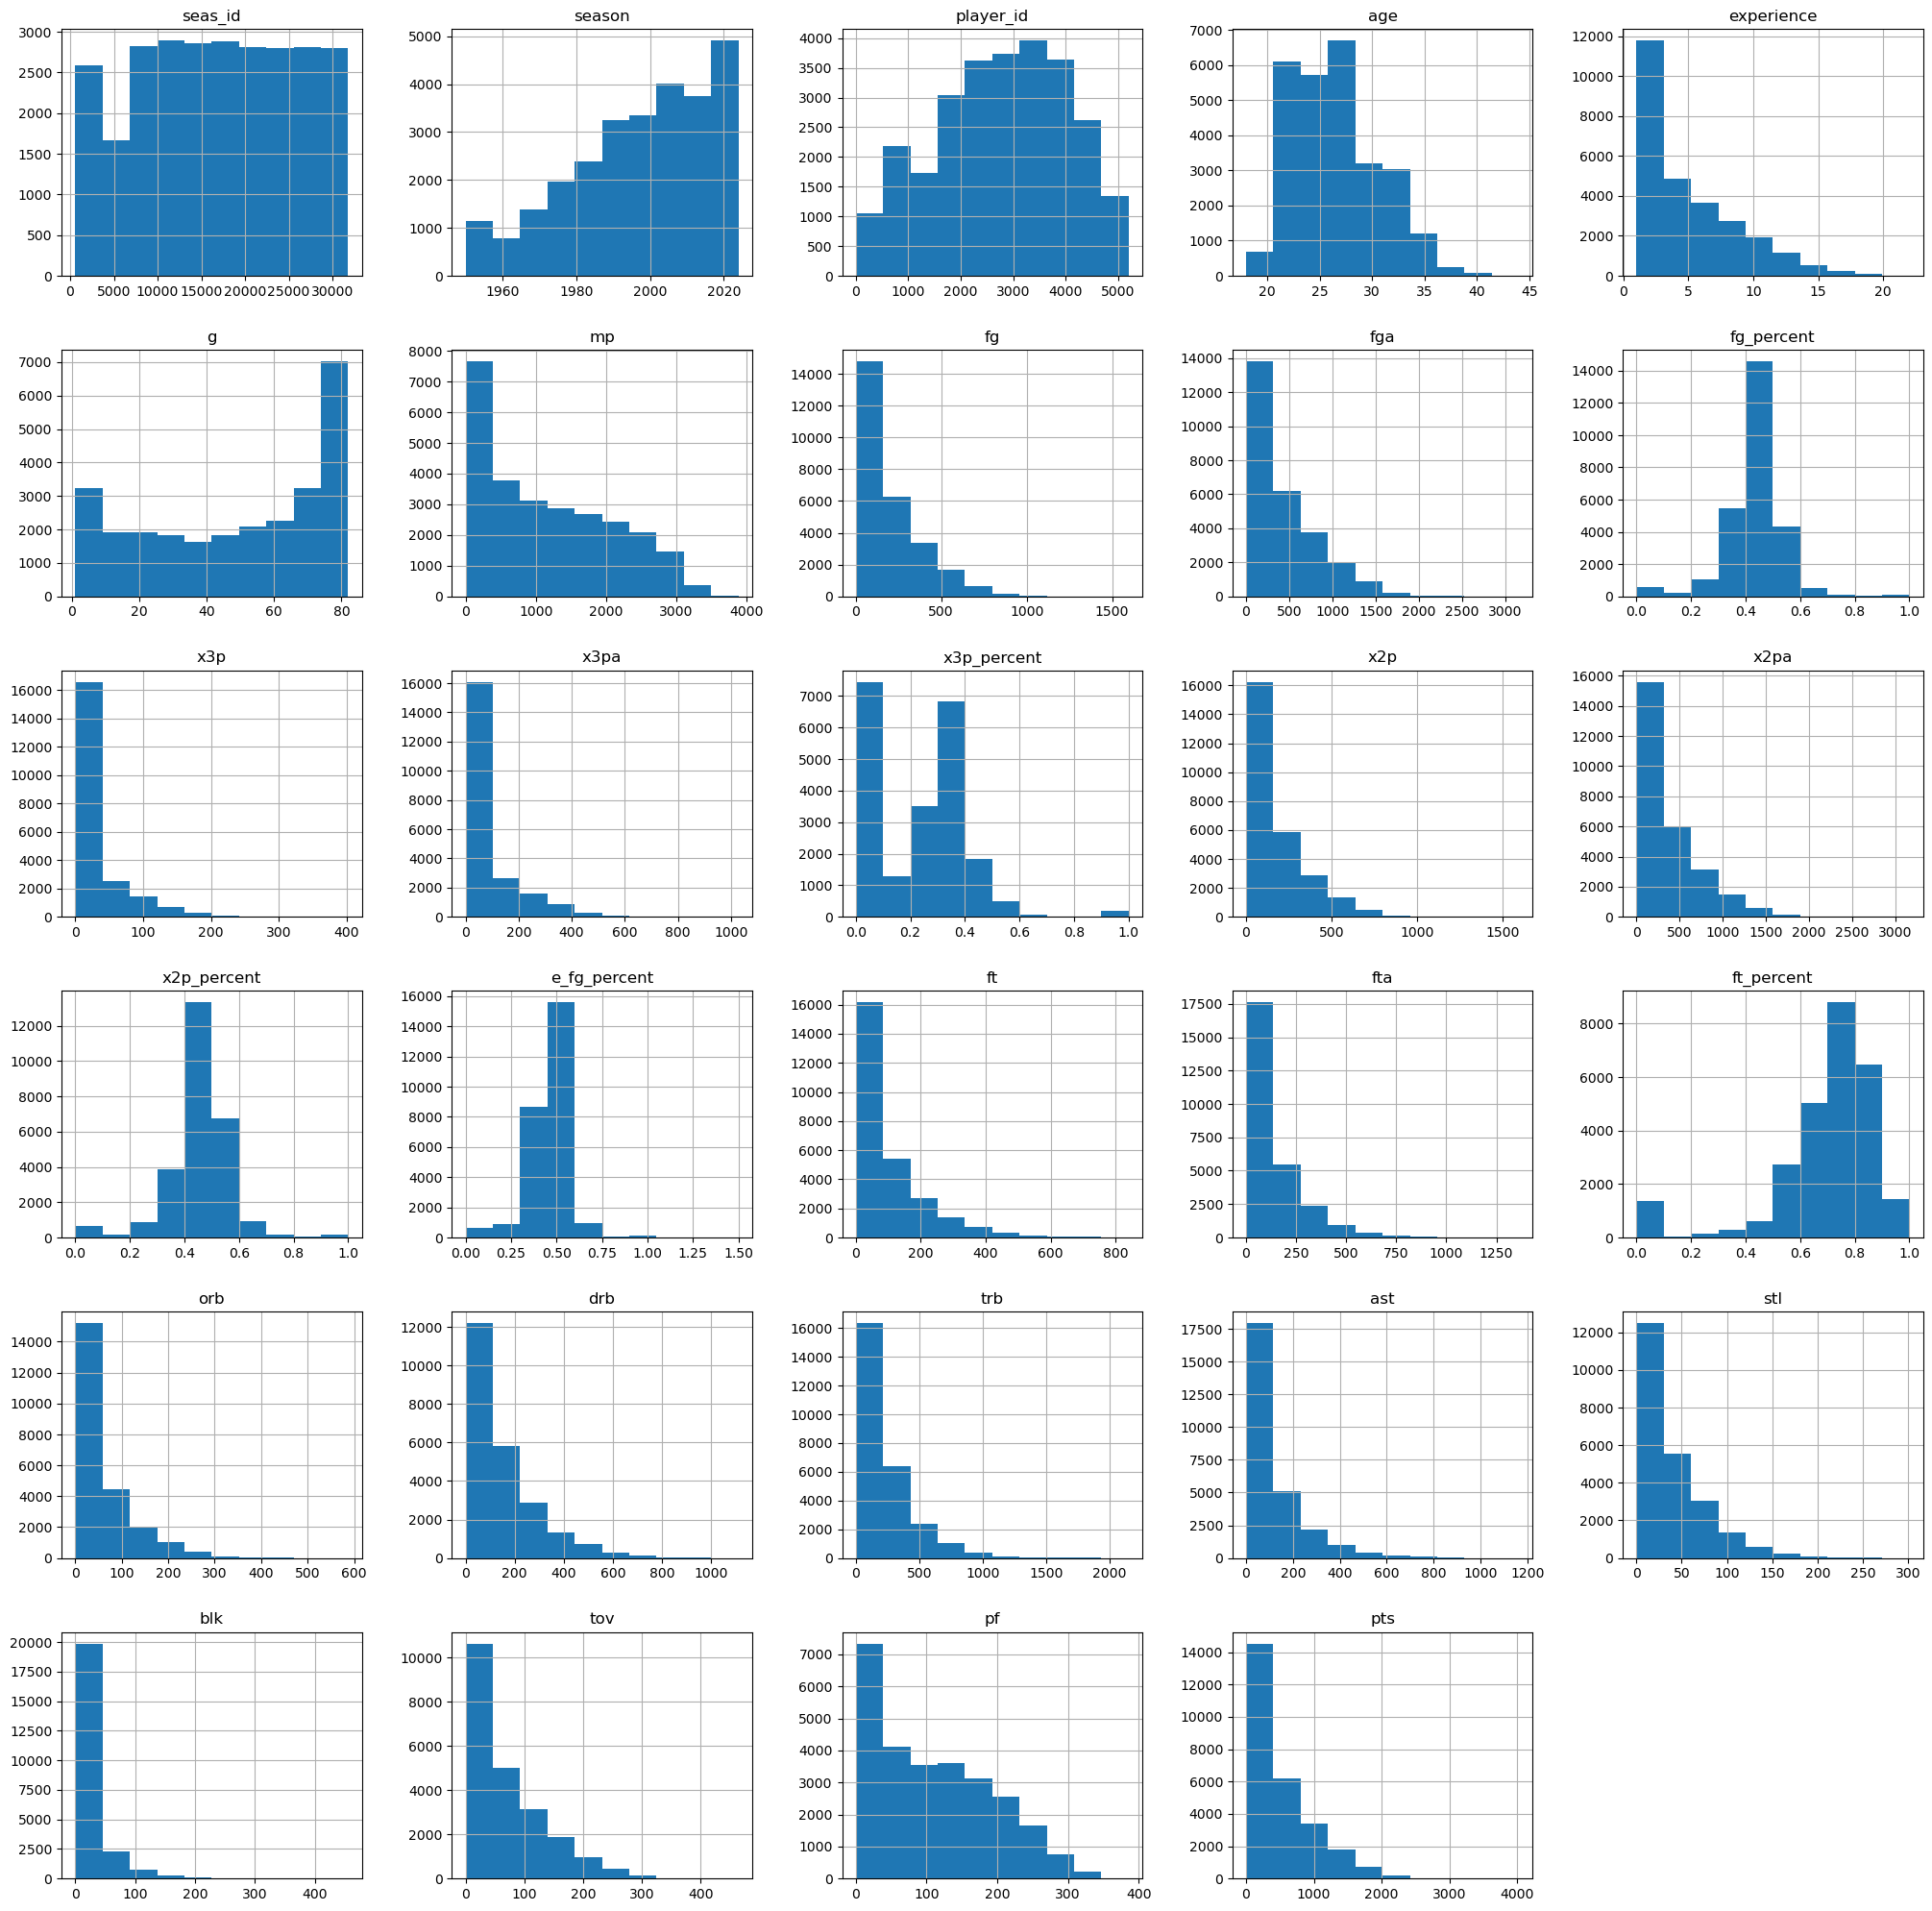

In [10]:
#visually examine each feature in players for appropriate distribution patters
players.hist(figsize=(25, 25));

In [11]:
#the player data looks good.  Take a closer look at x2a and x2pa, why does the distribution have two peaks?

In [12]:
# pairplot with hue age
#sns.pairplot(players, hue ='pts')

In [13]:
# pairplot with hue team
#sns.pairplot(teams, hue ='team')

In [14]:
#explore the player data by position
players["pos"].value_counts()

pos
SG     5534
PF     5467
C      5238
SF     5180
PG     5066
G       127
F       111
G-F      72
F-C      64
F-G      49
C-F      30
Name: count, dtype: int64

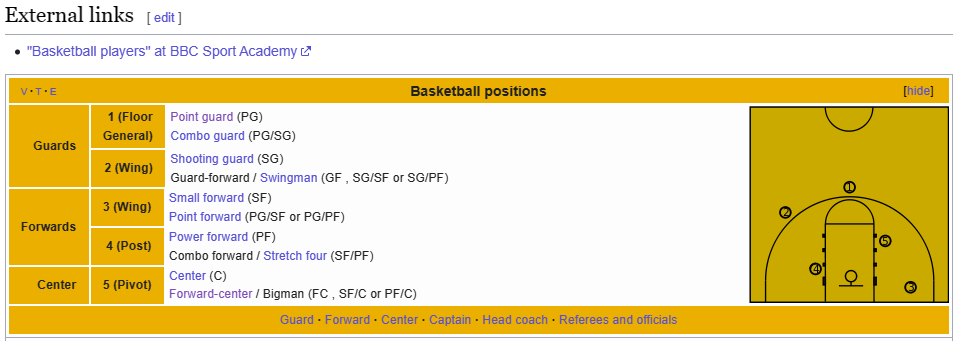

In [15]:
#C-SF, PG-SF, SF-C, SF-PG, and SG-PG-SF positions are whole numbers because there is only one player for this position.
#Investigate positions.

players.loc[players["pos"] == "PG-SF", ["player", "g", "pts", "x2p", "x2pa", "ft", "fta", "ast", "pf"]]

,player,g,pts,x2p,x2pa,ft,fta,ast,pf


In [16]:
#Jalen Rose played PG in 2004 twice.
#a PG-SF player is a forward, replace with SF
players['pos'].replace("PG-SF", "SF", inplace=True)

In [17]:
players.loc[players["pos"] == "C-SF", ["player", "g", "pts", "x2p", "x2pa", "ft", "fta", "ast", "pf"]]

,player,g,pts,x2p,x2pa,ft,fta,ast,pf


In [18]:
#Steve Kuberski only played C in 1976 with BOS.
#A C-SF player is a center, replace with C.
players['pos'].replace("C-SF", "C", inplace=True)

In [19]:
players.loc[players["pos"] == "SF-C", ["player", "g", "pts", "x2p", "x2pa", "ft", "fta", "ast", "pf"]]

,player,g,pts,x2p,x2pa,ft,fta,ast,pf


In [20]:
#DeMarre Carrol only played C in 2020 with HOU.
#A SF-C player is a center, replace with C.
players['pos'].replace("SF-C", "C", inplace=True)

In [21]:
players.loc[players["pos"] == "SF-PG", ["player", "g", "pts", "x2p", "x2pa", "ft", "fta", "ast", "pf"]]

,player,g,pts,x2p,x2pa,ft,fta,ast,pf


In [22]:
#This Greg Smith (there are two in the data) played for three teams in 1973.
#In 1973 he played both PG and SF.
#a SF-PG player is a forward, replace with SF.
players['pos'].replace("SF-PG", "SF", inplace=True)

In [23]:
players.loc[players["pos"] == "SG-PG-SF", ["player", "g", "pts", "x2p", "x2pa", "ft", "fta", "ast", "pf"]]

,player,g,pts,x2p,x2pa,ft,fta,ast,pf


In [24]:
#Tomas is listed 5 of 9 times as a SG.
#a SG-PG-SF player is a guard, replace with SG.
players['pos'].replace("SG-PG-SF", "SG", inplace=True)

In [25]:
#Replace those with the primary modern game position.
#a SF-SG player is a guard.
players['pos'].replace("SF-SG", "SG", inplace=True)
#a C-PF is a center.
players['pos'].replace("C-PF", "C", inplace=True)
#a SG-PG player is a guard, a PG.
players['pos'].replace("SG-PG", "PG", inplace=True)
#a PF-SF player is a forward, a PF.
players['pos'].replace("PF-SF", "PF", inplace=True)
#a PF-C player is a center.
players['pos'].replace("PF-C", "C", inplace=True)
#a SG-SF player is a guard, a SG.
players['pos'].replace("SG-SF", "SG", inplace=True)
#a C-F player is a center.
players['pos'].replace("C-F", "C", inplace=True)
#a PG-SG player is a guard, a PG.
players['pos'].replace("PG-SG", "PG", inplace=True)
#a SF-PF player is a forward, a PF
players['pos'].replace("SF-PF", "PF", inplace=True)
#a SG-PF player is a guard, a SG.
players['pos'].replace("SG-PF", "SG", inplace=True)
#a G player is a guard, change to PG.
players['pos'].replace("G", "PG", inplace=True)
#a F player is a forward, change to PF.
players['pos'].replace("F", "PF", inplace=True)
#a G-F player is a guard, change to SG.
players['pos'].replace("G-F", "SG", inplace=True)
#a F-C player is a center, change to C.
players['pos'].replace("F-C", "C", inplace=True)
#a F-G player is a guard, change to SG.
players['pos'].replace("F-G", "SG", inplace=True)

In [26]:
#The modern game is played with SF, C, PG, PF and SG.
#the changes above should reflect that.
players["pos"].value_counts()

pos
SG    5655
PF    5578
C     5332
PG    5193
SF    5180
Name: count, dtype: int64

In [27]:
#print columns for reference
players.columns

Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'lg', 'tm', 'g', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft',
       'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts'],
      dtype='object')

In [28]:
#plot 2 point field goals vs. total points by season per player color code by total points

from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

source = ColumnDataSource(data=players)
mapper = linear_cmap(field_name="pts", palette=YlOrBr8,
                    low=min(players["pts"]), high=max(players["pts"]))
#sizes = players["pts"]/50
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Name", "@player"), ("Position", "@pos"),
           ("Points", "@pts"), ("2pt FG", "@x2p"), ("Season", "@season")]
fig = figure(x_axis_label="2-Pt Field Goals", y_axis_label="Total Points",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Points vs. 2 Point Field Goals")
fig.circle(x="x2p", y="pts", source=source, size=6,
           fill_color=mapper, line_color=mapper, fill_alpha=0.2)
color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
fig.add_layout(color_bar, "right")
output_file(filename="nba_player_2pt_points.html")
show(fig)

In [29]:
#for setting figure range in following bokeh plot
players["pts"].max()

4029

In [30]:
#for setting figure range in following bokeh plot
players["ast"].max()

1164

In [31]:
#plot assist vs. points by season per player and colorcode with years in the league by player position.

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

pg = players.loc[players["pos"] == "PG"]
sg = players.loc[players["pos"] == "SG"]
sf = players.loc[players["pos"] == "SF"]
pf = players.loc[players["pos"] == "PF"]
c = players[players["pos"] == "C"]

title = Div(text="NBA Points vs. Assists by Position (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"),
           ("Points", "@pts"), ("Assists", "@ast"), ("Season", "@season")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="Assists per Season", y_axis_label="Points per Season",
                 x_range=(0,1200), y_range=(0,4100), tooltips=TOOLTIPS)
    fig.circle(x="ast", y="pts", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [32]:
#plot free throws vs. personal fouls by season per player and colorcode with years in the league by player position.
#this will provide a comparison of how many free throws the player provides for his team vs. the opponent.

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="NBA Personal Fouls vs. Free Throws by Position (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"),
           ("Free Throws", "@ft"), ("Personal Fouls", "@pf"), ("Season", "@season")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="Personal Fouls per Season", y_axis_label="Free Throws per Season",
                 x_range=(0,400), y_range=(0,1000), tooltips=TOOLTIPS)
    fig.circle(x="pf", y="ft", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [33]:
#plot free throws vs. free throw attempts by season per player and colorcode with years in the league by player position.
#how prolific and good is the player at free throws.

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="NBA Personal Free Throws vs. Free Throw Attempts by Position (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"),
           ("Free Throws", "@ft"), ("Free Throw Attempts", "@fta"), ("FT%", "@ft_percent"),
              ("Season", "@season")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="Free Throw Attempts per Season", y_axis_label="Free Throws per Season",
                 x_range=(0,1500), y_range=(0,1000), tooltips=TOOLTIPS)
    fig.circle(x="fta", y="ft", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [34]:
#plot 2pt field goals vs. 2pt field goal attempts by season per player and colorcode with years in the league by player position.
#how prolific and good is the player at 2pt shooting.

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="NBA 2pt Field Goals vs. 2pt Field Goal Attempts by Position (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"),
           ("2pt Field Goals", "@x2p"), ("2pt Field Goal Attempts", "@x2pa"), ("2pt%", "@x2p_percent"),
               ("Season", "@season")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="2pt Field Goal Attempts per Season", y_axis_label="2pt Field Goals per Season",
                 x_range=(0,3000), y_range=(0,2000), tooltips=TOOLTIPS)
    fig.circle(x="x2pa", y="x2p", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [35]:
#plot games played vs. season by season per player and colorcode with years in the league by player position.
#how prolific and good is the player at 2pt shooting.

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="Games Played vs. Total Points (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"),
           ("Games Played", "@g"), ("Season", "@season"), ("2pt%", "@x2p_percent"), ("ft%", "@ft_percent")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="Games Played", y_axis_label="Total Points",
                 x_range=(0,100), y_range=(0,5000), tooltips=TOOLTIPS)
    fig.circle(x="g", y="pts", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [36]:
#defensive play statistics tracking began with the 1974 season.
#steals, blocks, offensive rebounds, defensive rebounds were all added statistics.
#total rebounds were tracked since 1951 season.  
#is there a correlation between total rebounds and two point field goal attempts. 

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="Total Rebounds vs. 2pt Field Goal Attempts (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"), ("Games Played", "@g"),
                ("Season", "@season"), ("Total Rebounds", "@trb"), ("2pt Field Goal Attempts", "@x2pa")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="Total Rebounds", y_axis_label="2pt Field Goal Attempts",
                 x_range=(0,2000), y_range=(0,2500), tooltips=TOOLTIPS)
    fig.circle(x="trb", y="x2pa", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [37]:
#the three point line was adopted by the NBA for the 1979-1980 season.
#the additional 1 point per shot could favor those who played in the NBA from 1979-present
#plot and see who the top 3pt shooters are by position and season.  Are they the same players as the top 2pt shooters?

from bokeh.models import Div
from bokeh.layouts import layout, gridplot
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import YlOrBr8
from bokeh.models import ColorBar

title = Div(text="Three Point Field Goals vs. 3pt Field Goal Attempts (All Seasons)")
plots = []

for df in [pg, sg, sf, pf, c]:
    source = ColumnDataSource(data=df)
    TOOLTIPS = [("Name", "@player"), ("Team", "@tm"), ("Position", "@pos"), ("Games Played", "@g"),
                ("Season", "@season"), ("Three Pointers", "@x3p"), ("3pt Field Goal Attempts", "@x3pa"),
                ("3pt%", "@x3p_percent")]
    mapper = linear_cmap(field_name="experience", palette=YlOrBr8,
                         low=min(df["experience"]), high=max(df["experience"]))
    fig = figure(x_axis_label="3pt Field Goal Attempts", y_axis_label="3pt Field Goals",
                 x_range=(0,1000), y_range=(0,500), tooltips=TOOLTIPS)
    fig.circle(x="x3pa", y="x3p", source=source, legend_label=df["pos"].unique()[0],
              fill_color=mapper, line_color=mapper)
    color_bar = ColorBar(color_mapper=mapper["transform"], width=8)
    fig.add_layout(color_bar, "right")
    fig.legend.location = "bottom_right"
    plots.append(fig)
output_file(filename="subplots_with_Div.html")
show(layout([title], [gridplot(plots, ncols=2)]))

In [38]:
#Player data looks correct.  The next step is to evaluate the top players over their careers and 
#statistical significance of their performance and come to final decisions about GOAT segments. 

### Team Dataset EDA

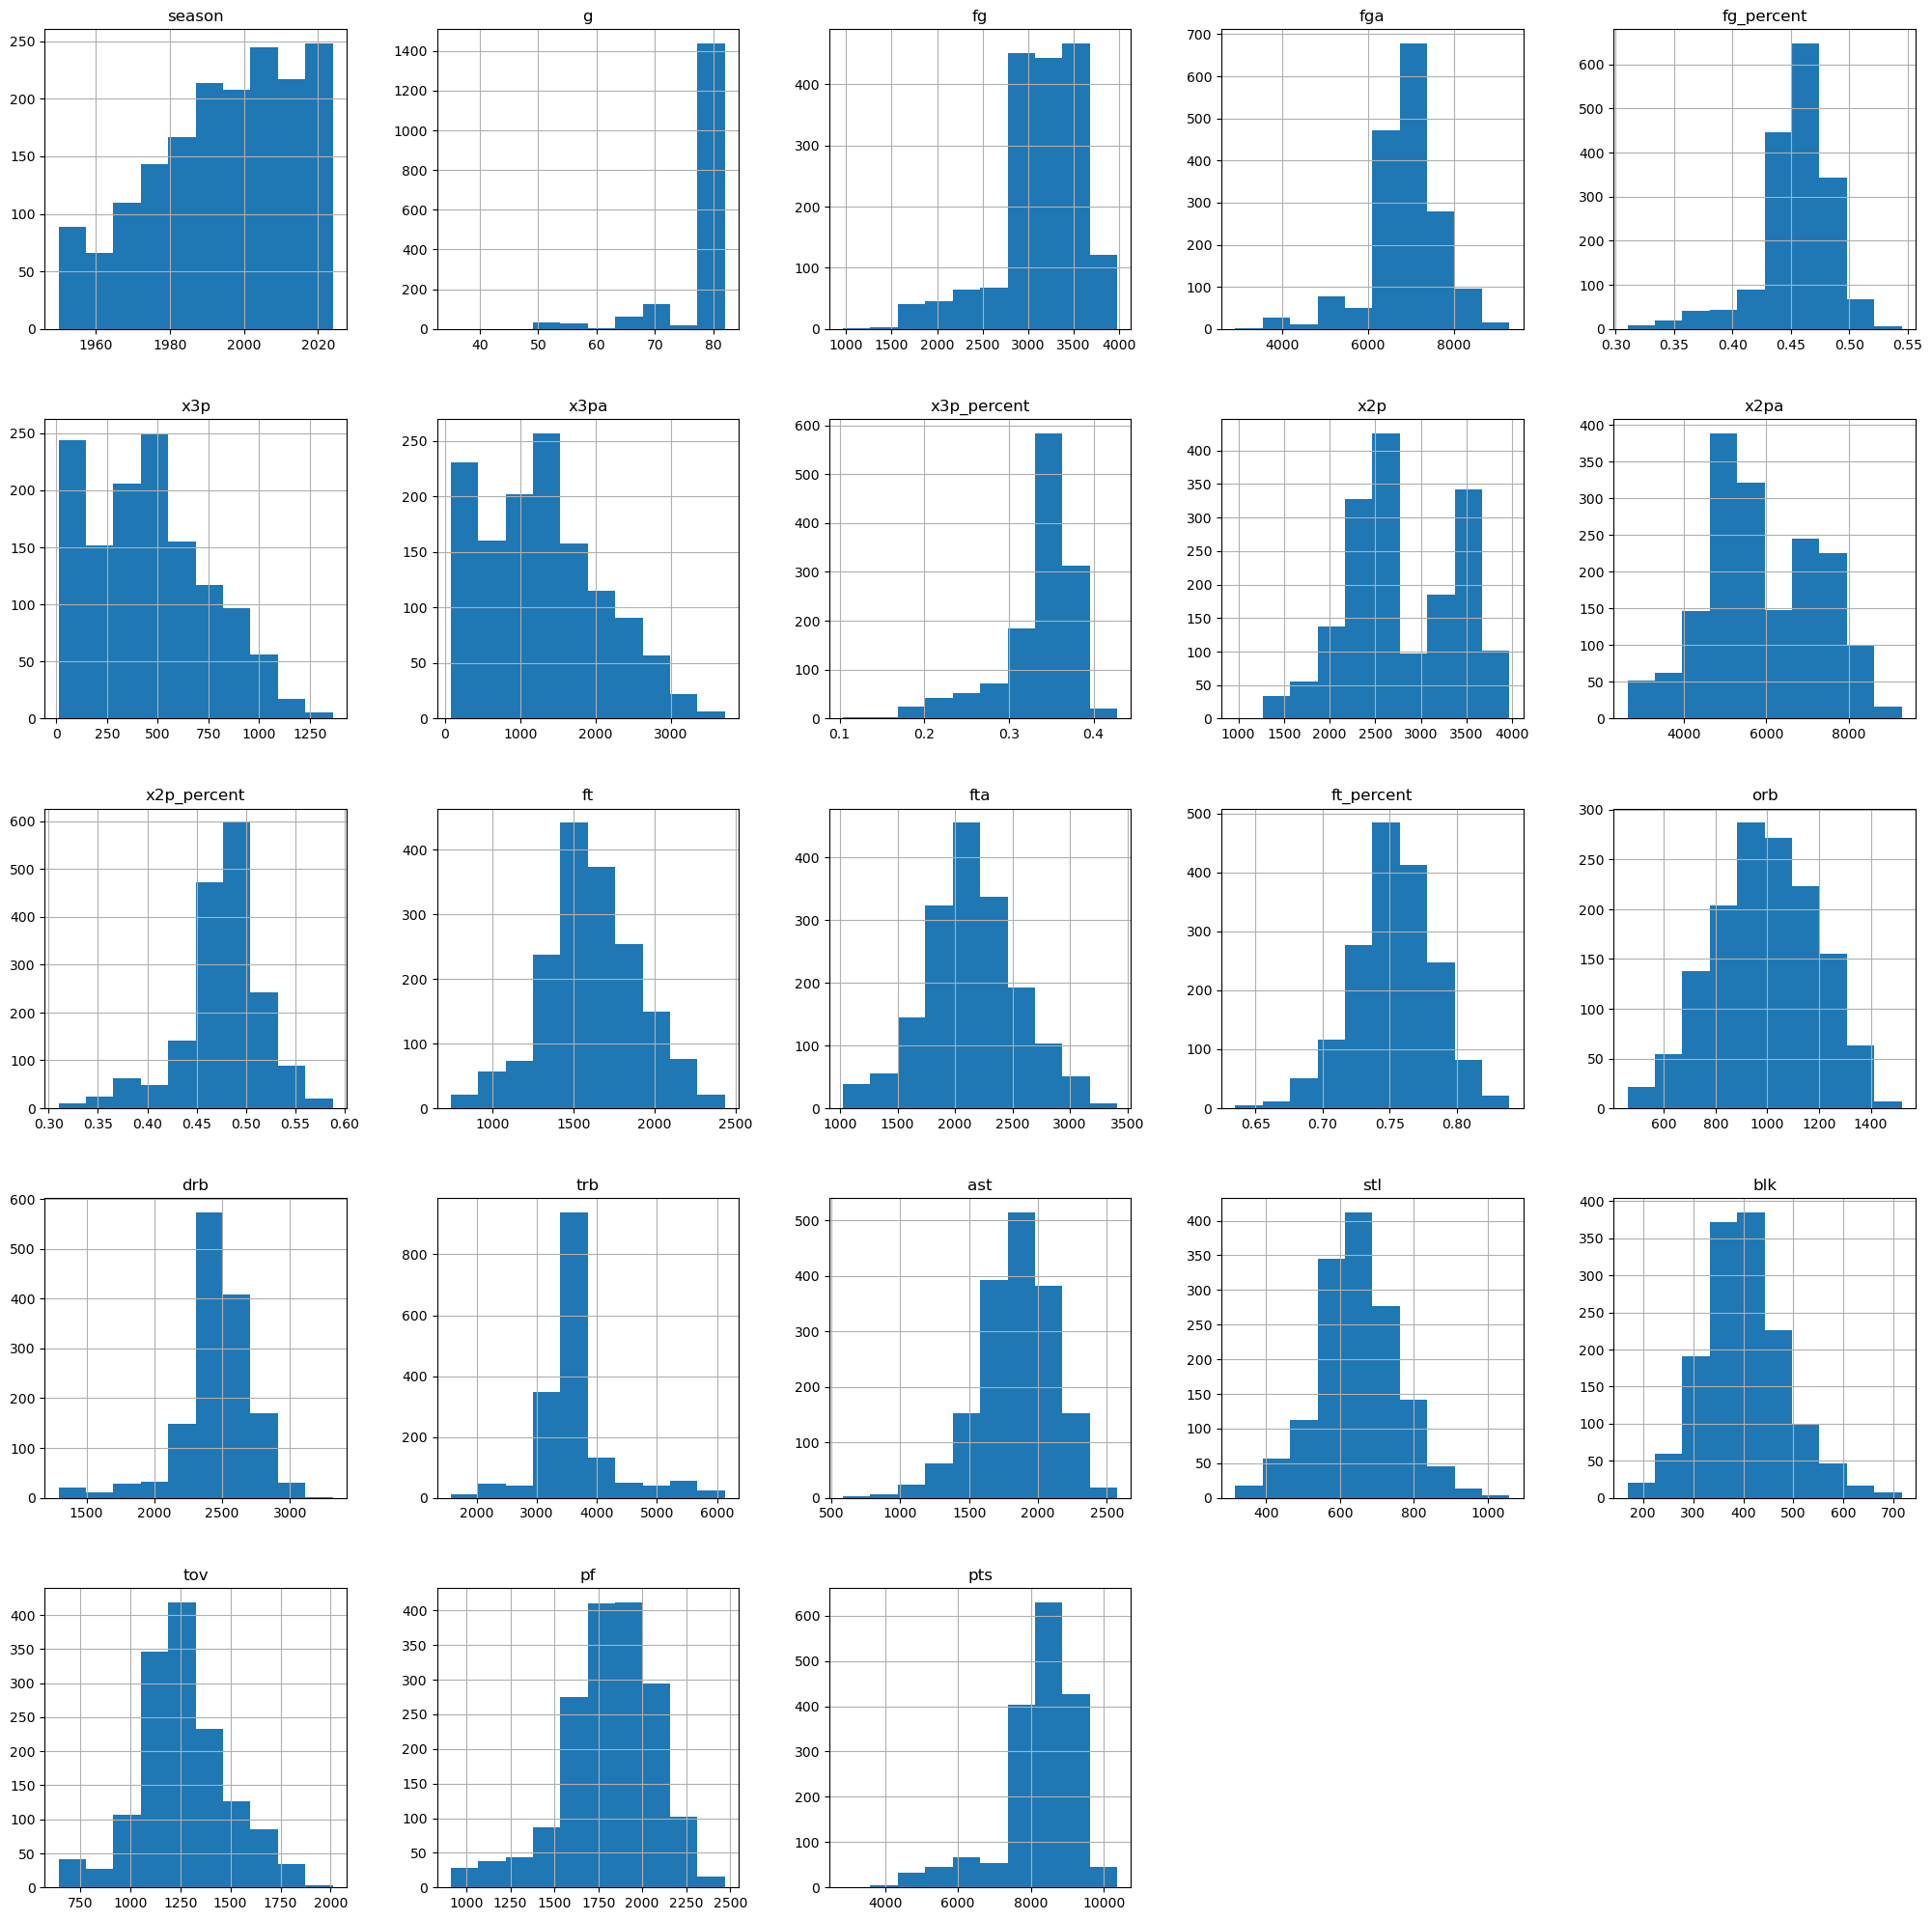

In [39]:
#visually examine each feature in teams for appropriate distribution patters
teams.hist(figsize=(25, 25));

In [40]:
# it looks like NBA season length changes through the years. is this true?
# team 2pt field goals and 2pt field goal attempts has two peaks in the distribution.  why?
# total rebounds has an odd distribution.  why?
# it looks like many features are skewed by teams that did not exist for long periods of time.  i.e. the pts feature.

In [41]:
#investigate the x2p column at both peaks and the valley inbetween in histogram above.
teams[teams["x2p"].between(2400, 2600)]
#this is a 200 row sample of the segment from the left high peak.

,season,lg,team,abbreviation,playoffs,g,fg,fga,fg_percent,x3p,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
35,2023,NBA,Charlotte Hornets,CHO,False,82.0,3385.0,7413.0,0.457,881.0,...,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,1661.0,9098.0
36,2023,NBA,Cleveland Cavaliers,CLE,False,82.0,3408.0,6984.0,0.488,950.0,...,0.780,795.0,2574.0,3369.0,2045.0,586.0,384.0,1094.0,1560.0,9205.0
41,2023,NBA,Houston Rockets,HOU,False,82.0,3329.0,7286.0,0.457,856.0,...,0.754,1100.0,2695.0,3795.0,1835.0,600.0,374.0,1332.0,1679.0,9081.0
45,2023,NBA,Memphis Grizzlies,MEM,False,82.0,3585.0,7551.0,0.475,985.0,...,0.733,988.0,2835.0,3823.0,2135.0,680.0,473.0,1116.0,1643.0,9587.0
48,2023,NBA,Minnesota Timberwolves,MIN,False,82.0,3515.0,7167.0,0.490,997.0,...,0.755,749.0,2686.0,3435.0,2145.0,657.0,444.0,1258.0,1768.0,9494.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1956,NBA,Rochester Royals,ROC,False,72.0,2551.0,6890.0,0.370,NaN,...,0.700,NaN,NaN,4449.0,1747.0,NaN,NaN,NaN,1990.0,6900.0
1633,1956,NBA,St. Louis Hawks,STL,True,72.0,2506.0,6628.0,0.378,NaN,...,0.703,NaN,NaN,4493.0,1748.0,NaN,NaN,NaN,1971.0,6953.0
1634,1956,NBA,Syracuse Nationals,SYR,True,72.0,2466.0,6661.0,0.370,NaN,...,0.756,NaN,NaN,4060.0,1710.0,NaN,NaN,NaN,1783.0,6976.0
1635,1956,NBA,League Average,AVG,False,72.0,2544.0,6580.0,0.387,NaN,...,0.745,NaN,NaN,4327.0,1747.0,NaN,NaN,NaN,1898.0,7130.0


In [42]:
teams[teams["x2p"].between(2800, 3000)]
#this is a 200 row sample of the segment with the lowest amount of teams between the two high peaks in the histogram. 

,season,lg,team,abbreviation,playoffs,g,fg,fga,fg_percent,x3p,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
348,2013,NBA,Denver Nuggets,DEN,True,82.0,3339.0,6983.0,0.478,521.0,...,0.701,1092.0,2601.0,3693.0,2002.0,762.0,533.0,1253.0,1682.0,8704.0
416,2011,NBA,Memphis Grizzlies,MEM,True,82.0,3200.0,6801.0,0.471,309.0,...,0.750,970.0,2391.0,3361.0,1691.0,771.0,441.0,1145.0,1705.0,8195.0
447,2010,NBA,Memphis Grizzlies,MEM,False,82.0,3223.0,6875.0,0.469,344.0,...,0.733,1070.0,2496.0,3566.0,1543.0,645.0,399.0,1248.0,1655.0,8404.0
488,2009,NBA,Phoenix Suns,PHO,False,82.0,3373.0,6695.0,0.504,553.0,...,0.744,900.0,2520.0,3420.0,1905.0,589.0,420.0,1288.0,1691.0,8974.0
522,2008,NBA,Seattle SuperSonics,SEA,False,82.0,3125.0,7032.0,0.444,313.0,...,0.770,971.0,2688.0,3659.0,1748.0,531.0,400.0,1310.0,1680.0,7999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1958,NBA,Cincinnati Royals,CIN,True,72.0,2817.0,7339.0,0.384,NaN,...,0.712,NaN,NaN,4959.0,1578.0,NaN,NaN,NaN,1835.0,7322.0
1613,1958,NBA,New York Knicks,NYK,False,72.0,2884.0,7307.0,0.395,NaN,...,0.753,NaN,NaN,5385.0,1359.0,NaN,NaN,NaN,1865.0,8068.0
1616,1958,NBA,Syracuse Nationals,SYR,True,72.0,2823.0,7336.0,0.385,NaN,...,0.793,NaN,NaN,4895.0,1298.0,NaN,NaN,NaN,1820.0,7721.0
1617,1958,NBA,League Average,AVG,False,72.0,2810.0,7333.0,0.383,NaN,...,0.746,NaN,NaN,5160.0,1414.0,NaN,NaN,NaN,1834.0,7678.0


In [43]:
teams[teams["x2p"].between(3400, 3600)]
#this is a 200 row sample of the segment from the right high peak.

,season,lg,team,abbreviation,playoffs,g,fg,fga,fg_percent,x3p,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
957,1993,NBA,Los Angeles Clippers,LAC,True,82.0,3544.0,7329.0,0.484,133.0,...,0.718,1183.0,2360.0,3543.0,2242.0,847.0,491.0,1338.0,1920.0,8783.0
975,1992,NBA,Boston Celtics,BOS,True,82.0,3543.0,7196.0,0.492,110.0,...,0.808,1095.0,2583.0,3678.0,2072.0,636.0,484.0,1165.0,1686.0,8745.0
976,1992,NBA,Charlotte Hornets,CHH,False,82.0,3613.0,7568.0,0.477,117.0,...,0.755,1164.0,2367.0,3531.0,2284.0,822.0,309.0,1273.0,1819.0,8980.0
977,1992,NBA,Chicago Bulls,CHI,True,82.0,3643.0,7168.0,0.508,138.0,...,0.744,1173.0,2439.0,3612.0,2279.0,672.0,480.0,1088.0,1693.0,9011.0
982,1992,NBA,Golden State Warriors,GSW,True,82.0,3767.0,7427.0,0.507,254.0,...,0.746,1137.0,2376.0,3513.0,2064.0,854.0,375.0,1353.0,2049.0,9732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1961,NBA,New York Knicks,NYK,False,79.0,3422.0,8347.0,0.410,NaN,...,0.752,NaN,NaN,5315.0,1822.0,NaN,NaN,NaN,2223.0,8979.0
1590,1961,NBA,League Average,AVG,False,79.0,3584.0,8642.0,0.415,NaN,...,0.733,NaN,NaN,5789.0,1910.0,NaN,NaN,NaN,2121.0,9332.0
1595,1960,NBA,New York Knicks,NYK,False,75.0,3429.0,8153.0,0.421,NaN,...,0.765,NaN,NaN,5251.0,1667.0,NaN,NaN,NaN,1940.0,8800.0
1596,1960,NBA,Philadelphia Warriors,PHW,True,75.0,3549.0,8678.0,0.409,NaN,...,0.669,NaN,NaN,5916.0,1796.0,NaN,NaN,NaN,1715.0,8895.0


The team performance metrics are very similar across all three segments so something else is causing the dip in the x2a histogram. This can be verified by applying .describe() to each of the segments. This was performed, but not show here. The difference is inherent in the seasons these three samples include.  Segment 1 includes 1957-2023.  Segment includes 1957-2013. Segment three includes years from 1960-1993. The 1960-1993 time period (the second x2p peak) captures the strong growth years in the NBA with many teams added to the league and does not include the lock-out and COVID years (1999, 2012, 2020, 2021) with foreshorted seasons. The second segment includes years before the growth years and includes the 1999 (50 games played) and 2012 (66 games played). This severly impacts the total number of rows that were captured in the dataset for this segment.  The first segment, where the highest amount of NBA teams are captured includes years from 1957-2023.  The down years are mitigated by conclusion that this segment cuts across most of the years in the dataset and includes values closest to the mean (i.e. the average performance for NBA teams).  The data is correct and not influenced by outlier values or mistaken data entries. This also explains the similar dip in the x2pa histogram as the two features are dependent and highly correlated.

In [44]:
#what are the outlier teams
teams["g"].value_counts()

g
82.0    1365
72.0      96
80.0      50
66.0      49
50.0      30
68.0      15
55.0      14
81.0      13
75.0      10
79.0       9
54.0       9
73.0       8
71.0       7
64.0       6
56.0       5
70.0       5
65.0       4
69.0       3
53.0       3
62.0       3
74.0       1
67.0       1
35.0       1
Name: count, dtype: int64

Since the 1951-1952 NBA season, each team has played 82 games during the regular season1. This standard schedule has remained consistent, resulting in a total of 1,230 games played across the league each season. Before the adoption of the 82-game schedule, NBA teams played between 68 and 80 games per season1. The 82-game format has been in place since the 1967-1968 season and continues to be the norm.

https://fansided.com/2022/10/28/how-many-games-nba-season/

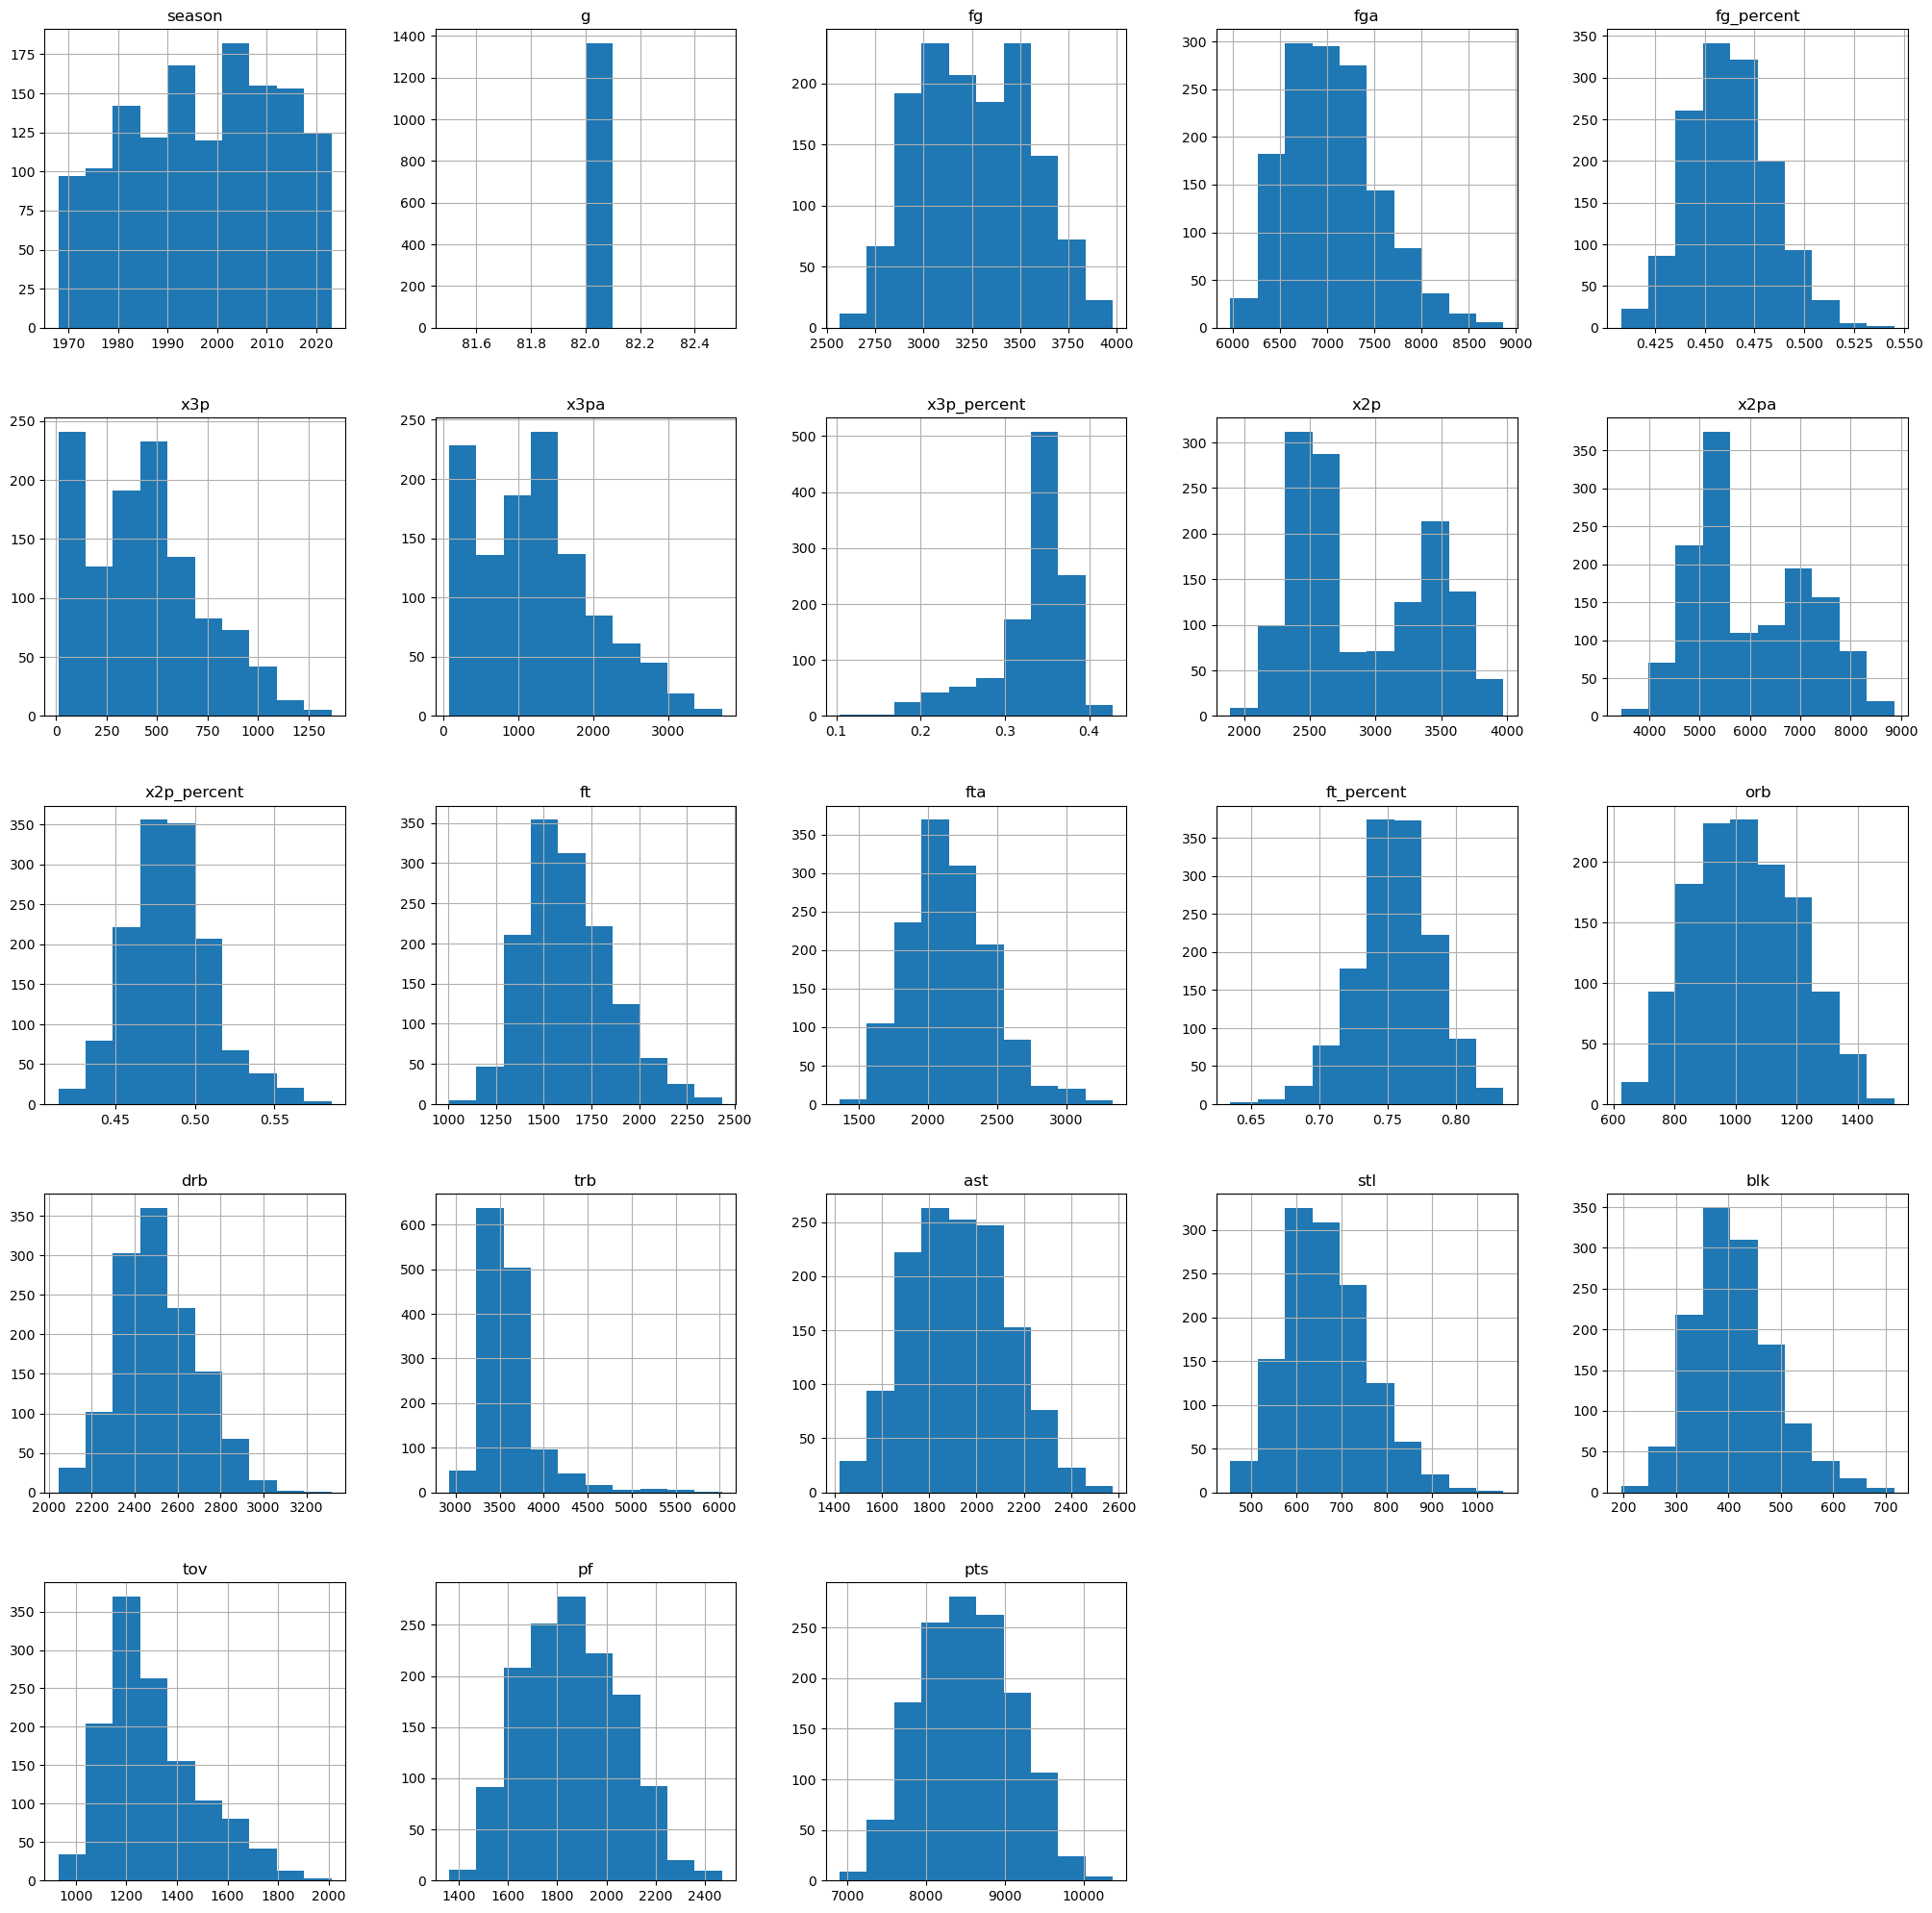

In [45]:
#subset the data by 82 game rows only and rerun the histogram to see how the distributions change.
full_season_teams = teams.loc[teams['g'] == 82]
full_season_teams.hist(figsize=(25, 25));

In [46]:
#this looks a lot better.
#the 82 game format stabilzed in 1967-1968 and the 3pt line began in the 1973-1974 season.
#by dropping the less than 82 game rows the distributions are much closer to a normal pattern.
#the fact that the 3pt histograms did not change is further proof that the dropped rows were teams from before this time.
#there is another dataset that tracks championships to use later to compare the remaining teams against those dropped if necessary.
full_season_teams.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [47]:
#what seasons are no longer represented after dropping the non-82 game rows?
full_season_teams['season'].value_counts()

season
2023    31
2011    31
2005    31
2006    31
2008    31
2009    31
2010    31
2007    31
2022    31
2015    31
2016    31
2017    31
2018    31
2019    31
2014    31
2000    30
1996    30
1997    30
1998    30
2003    30
2001    30
2002    30
2004    30
2013    29
1992    28
1990    28
1991    28
1993    28
1994    28
1995    28
1989    26
1988    24
1987    24
1986    24
1985    24
1984    24
1983    24
1982    24
1981    24
1978    23
1977    23
1979    23
1980    23
1976    19
1975    19
1974    18
1973    18
1972    18
1971    18
1970    15
1969    15
1968    13
Name: count, dtype: int64

In [48]:
#this confirms that the dataset only includes teams from the 1967-1968 season to present.
#in this 82 game subset, seasons 1999, 2012, 2020, and 2021 are missing? They do exist in the original teams data.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#teams['season'].value_counts()
#teams.loc[teams['season'] == "1999-01-01"]...50 games recorded
#teams.loc[teams['season'] == "2012-01-01"]...66 games recorded
#teams.loc[teams['season'] == "2020-01-01"]...ranges from 64 games to 75 games recorded
#teams.loc[teams['season'] == "2021-01-01"]...72 games recorded

During the 1998-99 NBA season, the league played fewer games than usual. Normally, an NBA season consists of 82 games for each team. However, due to a labor dispute between the NBA and the players’ union over salaries, the 1998-99 season was shortened. The lockout lasted from July 1, 1998, until January 20, 1999. As a result, the regular season was cut down to 50 games per team.

https://en.wikipedia.org/wiki/1999_NBA_Finals

During the 2011-2012 NBA season, the league played fewer games than the usual 82-game regular season. Due to a lockout of the players by the NBA owners, which began on June 30, 2011, the entire preseason was canceled, and hundreds of regular-season games were affected. A resolution was finally reached on November 25, ending the 149-day standoff. As a result, the regular season was shortened to 66 games, and it began on Christmas Day123. The reduced number of games impacted team schedules and player performance during that season.

https://en.wikipedia.org/wiki/2011%E2%80%9312_NBA_season

In the 2019-2020 NBA season, the league played a reduced number of games due to the COVID-19 pandemic. The regular season typically consists of 82 games for each team, but during this season, the schedule was shortened.

The official number of games played varied for different teams, but most teams completed around 70 to 73 games before the season was suspended in March 2020. The suspension was followed by a modified format for the playoffs held in a “bubble” environment at Walt Disney World in Orlando, Florida.

https://en.wikipedia.org/wiki/2019%E2%80%9320_NBA_season

Yes, during the 2020-21 NBA season, each team played 72 regular-season games, which is 10 games fewer than the typical 82-game NBA season 12. The season began on December 22, 2020, and due to the COVID-19 pandemic, the regular season was shortened 3. The schedule was adjusted, and teams participated in a Play-In Tournament after the regular season to determine playoff seeding 1. The Play-In Tournament included teams with the seventh-highest through the tenth-highest winning percentages in each conference.

https://en.wikipedia.org/wiki/2020%E2%80%9321_NBA_season

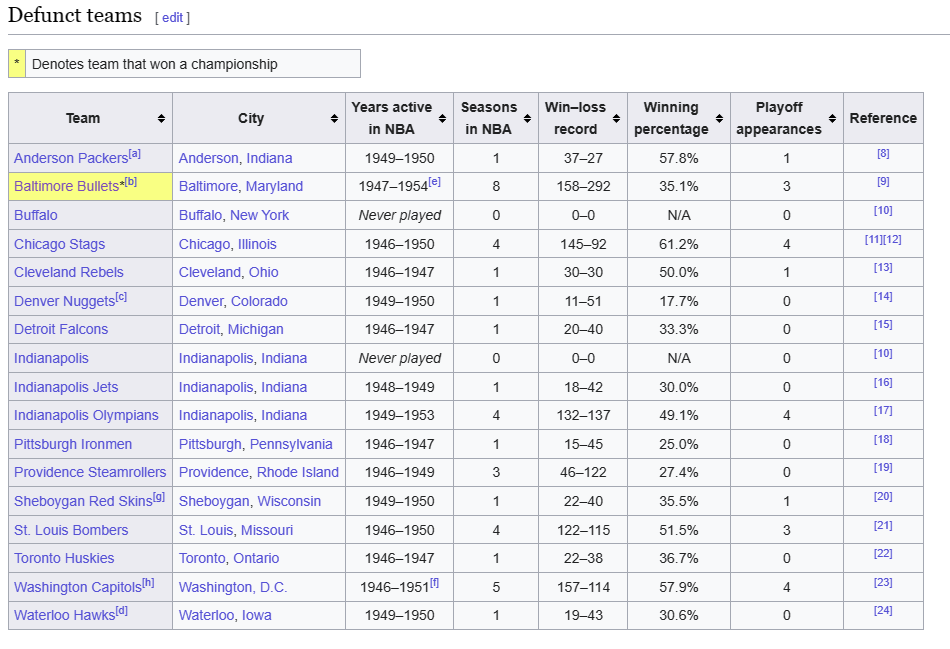

Source for table above is https://en.wikipedia.org/wiki/List_of_defunct_National_Basketball_Association_teams

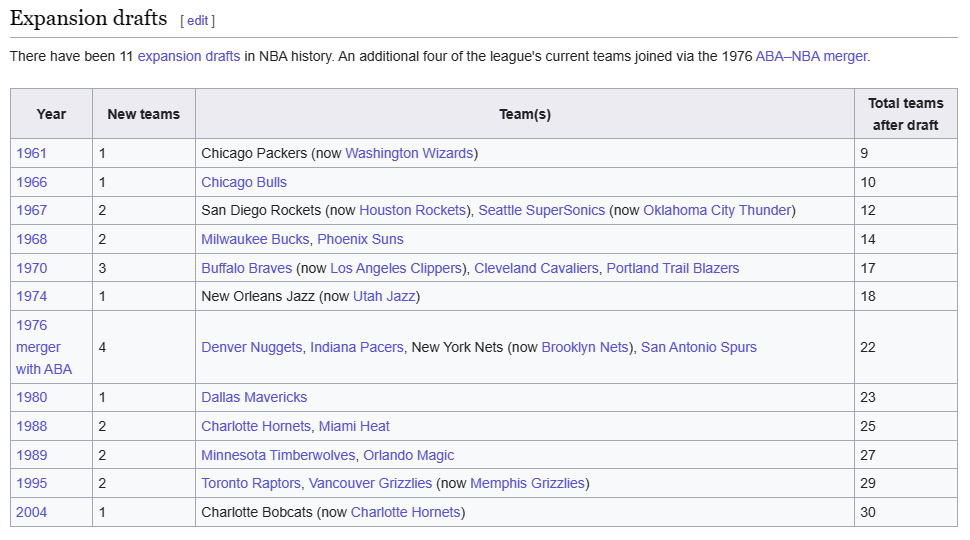

https://en.wikipedia.org/wiki/Expansion_of_the_National_Basketball_Association

In [49]:
# the variance in total team games played by season requires a more detailed approach to subset.
# some teams went defunct, some seasons were shorted, some teams were expansion teams.
# all useful rows can be captured by including seasons with 50 or more games played.
# and deleting the defunct teams.  There winning percentages are not GOAT worthy.
# due to all of the changes the best statistic to compare teams by is the % features as the counts will vary widely.

In [50]:
teams["team"].value_counts()

team
New York Knicks                      75
Boston Celtics                       75
League Average                       75
Detroit Pistons                      67
Los Angeles Lakers                   64
Philadelphia 76ers                   61
Chicago Bulls                        58
Phoenix Suns                         56
Milwaukee Bucks                      56
Atlanta Hawks                        56
Cleveland Cavaliers                  54
Portland Trail Blazers               54
Houston Rockets                      53
Golden State Warriors                53
Denver Nuggets                       49
San Antonio Spurs                    48
Indiana Pacers                       48
Utah Jazz                            45
Dallas Mavericks                     44
Seattle SuperSonics                  41
Los Angeles Clippers                 40
Sacramento Kings                     39
Miami Heat                           36
New Jersey Nets                      35
Orlando Magic                      

Interesting fact about the impact a single player can have on the game of basketball.

Led by Hall of Famer Julius "Dr. J" Erving, the Nets won two ABA championships in New York before becoming one of four ABA teams to be admitted into the NBA as part of the ABA–NBA merger in 1976. Unlike the other three ABA teams entering the NBA, who played in cities without any NBA presence, the Nets were required by the NBA to pay an "encroachment fee" of $4.8 million (equivalent to $25 million in 2022) to the New York Knicks. The team financed that payment by selling Erving's contract to the Philadelphia 76ers;and the Nets went from winning the last ABA title in 1975–76 to having the worst record in the NBA in 1976–77.

Need to check on Julius Erving's stats in the player's dataset as his point as a championship level player are not in the dataset as the ABA rows are dropped.

https://en.wikipedia.org/wiki/Brooklyn_Nets

In [51]:
#combine Tri-Cities Blackhawks, Milwaukee Hawks, St. Louis Hawks, Atlanta Hawks (same franchise)
#combine New Orleans/Oklahoma City Hornets, New Orleans Hornets, New Orleans Pelicans (same franchise)
#combine Cincinnati Royals, Kansas City-Omaha Kings, Kansas City Kings, Sacramento Kings (same franchise)
#combine San Diego Rockets, Houston Rockets (same franchise)
#combine New Orleans Jazz, Utah Jazz (same franchise)
#combine Vancouver Grizzlies, Memphis Grizzlies (same franchise)
#combine Buffalo Braves, San Diego Clippers, Los Angeles Clippers (same franchise)
#combine Philidelphia Warriors, San Francisco Warriors, Golden State Warriors (same franchise)
#combine Charlotte Hornets, Charlotte Bobcats (same franchise)
#combine Minneapolis Lakers, Los Angeles Lakers (same franchise)
#combine New York Nets, New Jersey Nets, Brooklyn Nets (same franchise) 
#combine Syracuse Nationals, Philadelphia 76ers (same franchise)
#combine Seattle SuperSonics, Oklahoma City Thunder (same franchise)
#combine Chicago Packers, Chicago Zephyrs, Baltimore Bullets, Capital Bullets, Washington Bullets, and Washington Wizards (same franchise) 
#combine Fort Wayne Pistons, Detroit Pistons (same franchise)
#drop League Average

The Bombers were one of seven teams that quickly left the NBA. The NBA contracted after the 1949–50 season, losing six of its 17 teams. The Anderson Packers, Sheboygan Red Skins and Waterloo Hawks jumped to the NPBL, while the Chicago Stags, Denver Nuggets and Bombers folded. Midway through the 1950–51 season, the Washington Capitols folded as well, bringing the number of teams in the league down to ten.

https://en.wikipedia.org/wiki/St._Louis_Bombers

In [52]:
defunct_team_list = ["Anderson Packers", "Sheboygan Red Skins", "Waterloo Hawks", "Chicago Stags", "St. Louis Bombers",
                     "Washington Capitols", "Indianapolis Olympians"]

#the Indianapolis Olympians still hold the distinction of being the winning team in the longest game in NBA history
#they were the 75–73 victors in a six-overtime game against the Rochester Royals in a game played on January 6, 1951.
#https://en.wikipedia.org/wiki/Indianapolis_Olympians

print(teams.shape)
teams.drop(teams.index[teams['team'].isin(defunct_team_list)], inplace = True)
print(teams.shape) #should be 11 less

(1707, 27)
(1696, 27)


In [53]:
#combine the team names.
teams['team'] = teams['team'].replace(['Tri-Cities Blackhawks', 'Milwaukee Hawks', 'St. Louis Hawks'], 'Atlanta Hawks')
teams['team'] = teams['team'].replace(['New Orleans/Oklahoma City Hornets', 'New Orleans Hornets'], 'New Orleans Pelicans')
teams['team'] = teams['team'].replace(['Rochester Royals', 'Cincinnati Royals', 'Kansas City-Omaha Kings', 'Kansas City Kings'], 'Sacramento Kings')
teams['team'] = teams['team'].replace(['San Diego Rockets'], 'Houston Rockets')
teams['team'] = teams['team'].replace(['New Orleans Jazz'], 'Utah Jazz')
teams['team'] = teams['team'].replace(['Vancouver Grizzlies'], 'Memphis Grizzlies')
teams['team'] = teams['team'].replace(['Buffalo Braves', 'San Diego Clippers'], 'Los Angeles Clippers')
teams['team'] = teams['team'].replace(['Philadelphia Warriors', 'San Francisco Warriors'], 'Golden State Warriors')
teams['team'] = teams['team'].replace(['Charlotte Hornets'], 'Charlotte Bobcats')
teams['team'] = teams['team'].replace(['Minneapolis Lakers'], 'Los Angeles Lakers')
teams['team'] = teams['team'].replace(['New York Nets', 'New Jersey Nets'], 'Brooklyn Nets')
teams['team'] = teams['team'].replace(['Syracuse Nationals'], 'Philadelphia 76ers')
teams['team'] = teams['team'].replace(['Seattle SuperSonics'], 'Oklahoma City Thunder')
teams['team'] = teams['team'].replace(['Chicago Packers', 'Chicago Zephyrs', 'Baltimore Bullets', 'Capital Bullets', 'Washington Bullets'], 'Washington Wizards')
teams['team'] = teams['team'].replace(['Fort Wayne Pistons'], 'Detroit Pistons')
#drop League Average.
teams = teams[teams['team'] != 'League Average']

teams['team'].value_counts()

team
Atlanta Hawks             75
Detroit Pistons           75
Sacramento Kings          75
Philadelphia 76ers        75
New York Knicks           75
Boston Celtics            75
Los Angeles Lakers        75
Golden State Warriors     75
Washington Wizards        68
Chicago Bulls             58
Houston Rockets           57
Oklahoma City Thunder     57
Phoenix Suns              56
Milwaukee Bucks           56
Los Angeles Clippers      54
Cleveland Cavaliers       54
Portland Trail Blazers    54
Utah Jazz                 50
Denver Nuggets            49
Indiana Pacers            48
San Antonio Spurs         48
Brooklyn Nets             48
Dallas Mavericks          44
Miami Heat                36
Orlando Magic             35
Minnesota Timberwolves    35
Charlotte Bobcats         34
Toronto Raptors           29
Memphis Grizzlies         29
New Orleans Pelicans      22
Name: count, dtype: int64

In [54]:
#now we have a nice ordered output of current NBA Franchises by current name and when they entered the league.
#the New York Knicks and the Boston Celtics are the only two franchises that retained their original franchise name.
#from 1946-Present.

In [55]:
#the former franchise names are retained in the 'abbreviation' column or each row for future refence and plotting
teams['abbreviation'].value_counts()

abbreviation
NYK    75
BOS    75
DET    67
LAL    64
PHI    61
CHI    58
PHO    56
MIL    56
ATL    56
POR    54
CLE    54
HOU    53
GSW    53
DEN    48
IND    48
SAS    48
UTA    45
DAL    44
SEA    41
LAC    40
SAC    39
MIA    36
NJN    35
ORL    35
MIN    35
TOR    29
WAS    27
MEM    23
WSB    23
OKC    16
CIN    15
SYR    14
CHH    14
PHW    13
STL    13
BRK    12
MNL    11
NOP    11
BAL    10
CHA    10
KCK    10
CHO    10
SFW     9
NOH     9
ROC     8
BUF     8
FTW     8
SDC     6
VAN     6
NOJ     5
BLB     5
SDR     4
MLH     4
KCO     3
TRI     2
NOK     2
CHZ     1
CHP     1
CAP     1
NYN     1
DNN     1
Name: count, dtype: int64

In [56]:
teams.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [57]:
len(teams["team"].value_counts())

30

In [58]:
teams["team"].unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets',
       'Chicago Bulls', 'Charlotte Bobcats', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

In [59]:
pal_inferno30 = ['#000003','#030212','#0A0723','#140B36','#200C4A','#2E0A5A',
                 '#3C0965','#4A0B6A','#570F6D','#63146E','#70196E','#7D1D6C',
                 '#892269','#962666','#A32B61','#AF315B','#BB3754','#C73E4C',
                 '#D14643','#DB4F3A','#E45A31','#EB6527','#F1721D','#F68012',
                 '#F98E08','#FB9D06','#FBAC10','#FABB21','#F8CB34','#F4DB4B']

In [60]:
pal_category30 = ['#ffd6d6', '#ff8585', '#ff3333', '#e00000', '#8f0000','#3d0000',
                  '#edd6ff', '#ca85ff', '#a733ff', '#7f00e0', '#51008f', '#23003d',
                  '#0000f0', '#00009e', '#adffad', '#33ff33', '#00b800', '#006600',
                  '#003d00', '#ffffd6', '#ffff85', '#ffff33', '#e0e000', '#8f8f00',
                  '#d6ffff', '#85ffff', '#00b8b8', '#006666', '#e8d9c4', '#ba8c4f']

In [61]:
import bokeh.palettes
bokeh.palettes.viridis(10)

('#440154',
 '#472777',
 '#3E4989',
 '#30678D',
 '#25828E',
 '#1E9C89',
 '#35B778',
 '#6BCD59',
 '#B2DD2C',
 '#FDE724')

In [62]:
viridis10 = ['#440154', '#472777', '#3E4989', '#30678D', '#25828E',
             '#1E9C89', '#35B778', '#6BCD59', '#B2DD2C', '#FDE724']

In [63]:
#plot 2 point field goals vs. total points by season per player color code by team
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
#from bokeh.io import curdoc

#curdoc().theme = "dark_minimal"
source = ColumnDataSource(data=teams)
pal = pal_category30
teams_list = teams["team"].unique()
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Team", "@team"), ("2pt Field Goal %", "@x2p_percent"),
           ("Free Throw %", "@ft_percent"), ("Season", "@season")]
fig = figure(x_axis_label="Free Throw Percent", y_axis_label="2-Pt Field Goal Percent",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Team Shooting Percentages (Colors = Teams)")
fig.circle(x="ft_percent", y="x2p_percent", source=source, size=8, fill_alpha=0.5,
           fill_color=factor_cmap("team", palette=pal, factors=teams_list), line_color="black")
output_file(filename="nba_team_shooting_percentages.html")
show(fig)

### Examine NBA major rule changes to identify logical time period segments for player and team comparisons
    Year	Major	Explanation
    1952	Major	Widened lane from six to twelve feet (to reduce dominance of George Mikan).
    1954	Major	Added the 24-second shot clock.
    1956	Major	Banned offensive goaltending (to reduce dominance of Wilt Chamberlain tap-ins over the rim)
    1964    Major   Widened lane from twelve feet to sixteen feet (to reduced dominance of Wilt Chamberlain)
    1979	Major	Three-point line introduced.
    1988	Major	Number of referees permanently increased from two to three
    1989	Major	When less than three-tenths of a second remaining on the clock, any shot other than a tip-in or 
                    an alley-oop    must be disallowed - "Trent Tucker Rule".
    1992	Major	Shot clock is reset only when the ball hits the rim.
                    Previously it was reset if the ball hit either the rim or backboard.
    1994	Major	Three shots awarded for foul on 3-point attempt.
    1994	Major	Any player who commits two flagrant fouls in one game will be ejected.
    1994	Major	3-point line shortened to a uniform 22 feet around the basket
    1997	Major	The "no-charge" area was expanded to a half circle with a four-foot radius measured from the middle
                    of the goal from a two by six-foot box.
    1997	Major	3-point line lengthened to original 23 feet, 9 inches, except in the corners where the distance
                    remained at 22 feet.
    1999	Major	Shot clock reset to 14 seconds if less than 14 seconds on the shot clock and unchanged if
                    greater than 14 seconds on the shot clock for a personal foul, kicked/punched ball,
                    and illegal defense that doesn't result in a free throw.
    2000	Major	Timeouts increased from six to seven, fourth-period timeouts increased from three to four.
    2001	Major	The time to advance the ball past midcourt reduced from 10 seconds to 8 seconds.
    2001	Major	Illegal defense eliminated and zone defense allowed. Defensive 3-second rule prohibits defensive player 
                    from being in the lane without guarding an offensive player.
    2002	Major	Instant replay implemented for review of certain last-second plays.
    2006	Major   American players must be at least 19 years old, and at least one NBA season must have elapsed since
                    they graduated from high school or, if they didn't graduate, when they would have graduated.
    2007	Major	Expansion of instant replay every year until 2015 (except 2010-11 - details considered minor)
    2016	Major	For away-from-the-play fouls and fouls before an inbounds, the team being fouled will be awarded one
                    free throw and retain possession of the ball - extended to the last two minutes of any period.
    2017	Major	Timeouts reduced from nine to seven per team per game with no more than two after the 3-minute mark of
                    the fourth quarter
    2021	Major	Implement the Coach's Challenge - allowing head coaches to challenge certain calls
    2022	Major	Introduce the 2-for-1 rule - to encourage teams to attempt two shots in the final 45 seconds of the 
                    first or second period so they can potentially get the ball back for the final possession

#### Video of How to Play Basketball by School of Sports YOUTUBE Channel (to help understand rule changes above)

https://www.bing.com/videos/riverview/relatedvideo?q=what+is+the+purpose+of+the+lane+in+basketball&mid=D086BE023EBAF908E4A4D086BE023EBAF908E4A4&FORM=VIRE

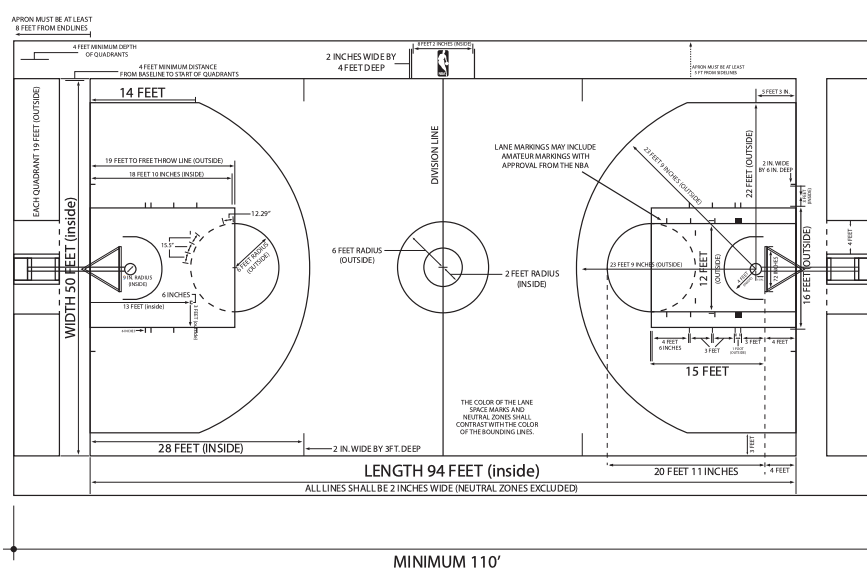

In [64]:
teams['season'].values.min()

1950

In [65]:
teams['season'].values.max()

2024

In [66]:
changes = []
for year in teams['season'].values:
    if 1950 <= year <= 1951:
        changes.append("No Major Change")
    if 1952 <= year <= 1953:
        changes.append("6'to 12' Lane")
    if 1954 <= year <= 1955:
        changes.append("24 Sec Shot Clock")
    if 1956 <= year <= 1963:
        changes.append("No Offensive Goaltending")
    if 1964 <= year <= 1978:
        changes.append("12' to 16' Lane")
    if 1979 <= year <= 1991:
        changes.append("3pt Line")
    if 1992 <= year <= 1993:
        changes.append("Shot Clock Reset")
    if 1994 <= year <= 1996:
        changes.append("3 Free Throws and 22ft 3pt Line")
    if 1997 <= year <= 2000:
        changes.append("No Charge Line and 23ft 9in 3pt line")
    if 2001 <= year <= 2024:
        changes.append("Advance Ball in 8 Sec and Zone Defense")
print(len(changes))
teams['change'] = changes

decades = []
for season in teams['season'].values:
    if 1950 <= season <= 1959:
        decades.append("1950-1959")
    if 1960 <= season <= 1969:
        decades.append("1960-1969")
    if 1970 <= season <= 1979:
        decades.append("1970-1979")
    if 1980 <= season <= 1989:
        decades.append("1980-1989")
    if 1990 <= season <= 1999:
        decades.append("1990-1999")
    if 2000 <= season <= 2009:
        decades.append("2000-2009")
    if 2010 <= season <= 2019:
        decades.append("2010-2019")
    if 2020 <= season <= 2024:
        decades.append("2020-2024")
print(len(decades))
teams['decade'] = decades

1621
1621


In [67]:
teams.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'fg', 'fga',
       'fg_percent', 'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa',
       'x2p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'change', 'decade'],
      dtype='object')

In [68]:
#plot 2 point field goals vs. total points by season per team color code by decade
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=teams)
pal = pal_category30
decades_list = teams["decade"].unique()
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Team", "@team"), ("2pt Field Goal %", "@x2p_percent"),
           ("Free Throw %", "@ft_percent"), ("Year", "@season")]
fig = figure(x_axis_label="Free Throw Percent", y_axis_label="2-Pt Field Goal Percent",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Team Shooting Percentages (Colors = Decades)")
fig.circle(x="ft_percent", y="x2p_percent", source=source, size=8, fill_alpha=0.5,
           fill_color=factor_cmap("decade", palette=pal, factors=decades_list), line_color="black")
output_file(filename="nba_team_shooting_percentages.html")
show(fig)

In [69]:
#plot points vs. rebounds by season per player color code by team
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=teams)
pal = pal_category30
decades_list = teams["decade"].unique()
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Team", "@team"), ("Points", "@pts"),
           ("Rebounds", "@trb"), ("Year", "@season")]
fig = figure(x_axis_label="Rebounds", y_axis_label="Points",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Team Rebounds vs. Points (Colors = Decades)")
fig.circle(x="trb", y="pts", source=source, size=8, fill_alpha=0.5,
           fill_color=factor_cmap("decade", palette=pal, factors=decades_list), line_color="black")
output_file(filename="nba_team_rebounds_vs_points.html")
show(fig)

In [70]:
#plot points vs. assists by season per player color code by team
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=teams)
pal = viridis10
decades_list = teams["decade"].unique()
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Team", "@team"), ("Points", "@pts"),
           ("Assists", "@ast"), ("Year", "@season")]
fig = figure(x_axis_label="Assists", y_axis_label="Points",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Team Assists vs. Points (Colors = Decades)")
fig.circle(x="ast", y="pts", source=source, size=8, fill_alpha=0.5,
           fill_color=factor_cmap("decade", palette=pal, factors=decades_list), line_color="black")
output_file(filename="nba_team_assists_vs_points.html")
show(fig)

In [71]:
#plot points vs. blocks by season per player color code by team
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import LassoSelectTool
from bokeh.models import BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=teams)
pal = viridis10
changes_list = teams["change"].unique()
tools = ["pan", "box_select", "lasso_select", "box_zoom", "wheel_zoom", "tap", "reset", "save"]
TOOLTIPS = [("Franchise", "@team"), ("Team", "@abbreviation"), ("Points", "@pts"), ("Change", "@change"), 
           ("Rebounds", "@trb"), ("Year", "@season")]
fig = figure(x_axis_label="Rebounds", y_axis_label="Points",
            tools = tools, tooltips=TOOLTIPS, title = "NBA Team Rebounds vs. Points (Colors = Major Rule Change)")
fig.circle(x="trb", y="pts", source=source, size=8, fill_alpha=0.5,
           fill_color=factor_cmap("change", palette=pal, factors=changes_list), line_color="black")
output_file(filename="nba_team_rebounds_vs_points_by_rule_change.html")
show(fig)

In [72]:
 #revise the players datatset
players.columns

Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'lg', 'tm', 'g', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft',
       'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts'],
      dtype='object')

In [73]:
#add new decade and change columns to the players dataset

changesp = []
for year in players['season'].values:
    if 1950 <= year <= 1951:
        changesp.append("No Major Change")
    if 1952 <= year <= 1953:
        changesp.append("6'to 12' Lane")
    if 1954 <= year <= 1955:
        changesp.append("24 Sec Shot Clock")
    if 1956 <= year <= 1963:
        changesp.append("No Offensive Goaltending")
    if 1964 <= year <= 1978:
        changesp.append("12' to 16' Lane")
    if 1979 <= year <= 1991:
        changesp.append("3pt Line")
    if 1992 <= year <= 1993:
        changesp.append("Shot Clock Reset")
    if 1994 <= year <= 1996:
        changesp.append("3 Free Throws and 22ft 3pt Line")
    if 1997 <= year <= 2000:
        changesp.append("No Charge Line and 23ft 9in 3pt line")
    if 2001 <= year <= 2024:
        changesp.append("Advance Ball in 8 Sec and Zone Defense")
print(len(changesp))
players['change'] = changesp

decadesp = []
for season in players['season'].values:
    if 1950 <= season <= 1959:
        decadesp.append("1950-1959")
    if 1960 <= season <= 1969:
        decadesp.append("1960-1969")
    if 1970 <= season <= 1979:
        decadesp.append("1970-1979")
    if 1980 <= season <= 1989:
        decadesp.append("1980-1989")
    if 1990 <= season <= 1999:
        decadesp.append("1990-1999")
    if 2000 <= season <= 2009:
        decadesp.append("2000-2009")
    if 2010 <= season <= 2019:
        decadesp.append("2010-2019")
    if 2020 <= season <= 2024:
        decadesp.append("2020-2024")
print(len(decadesp))
players['decade'] = decadesp
      
players.columns

26938
26938


Index(['seas_id', 'season', 'player_id', 'player', 'pos', 'age', 'experience',
       'lg', 'tm', 'g', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'x2p', 'x2pa', 'x2p_percent', 'e_fg_percent', 'ft',
       'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'change', 'decade'],
      dtype='object')

In [74]:
#add a boolean column to players dataframe with a 1 if player was an allstar or 0 if not by season
print(allstar.columns)

#drop unneeded colums to avoid extra work after merge
droplist = ['team', 'replaced', 'lg']
allstar.drop(columns = droplist, inplace = True)

#add allstar column with value of 1 (True) to allstar dataframe
allstar['allstar'] = 1
print(allstar.columns)

#merge allstar to players on player and season
players = pd.merge(players, allstar, how='left', on=['player', 'season'])

#fill NA values in players['allstar'] with 0 (False)
players.fillna(value = {'allstar':0}, inplace = True)

#validate. total values on allstar should be 1866 True and 27701 False (from previous code I deleted)
print(len(players))
players['allstar'].value_counts()

Index(['player', 'team', 'lg', 'season', 'replaced'], dtype='object')
Index(['player', 'season', 'allstar'], dtype='object')
26938


allstar
0.0    25108
1.0     1830
Name: count, dtype: int64

In [75]:
#additional validation choosing a player that is know to have been an allstar
players.loc[players['player'] == 'Michael Jordan', ['player', 'season', 'allstar']]

,player,season,allstar
12035,Michael Jordan,2003,1.0
12499,Michael Jordan,2002,1.0
14434,Michael Jordan,1998,1.0
14940,Michael Jordan,1997,1.0
15433,Michael Jordan,1996,1.0
15874,Michael Jordan,1995,0.0
16739,Michael Jordan,1993,1.0
17151,Michael Jordan,1992,1.0
17572,Michael Jordan,1991,1.0
17978,Michael Jordan,1990,1.0


Michael Jordan was voted as an all-star every year he played in the NBA.
Michael had retired from the NBA in 1993 to pursue professional baseball and did not rejoin the NBA in time from the 1995 game.
Michael retired again from 1999-2001.  He returned in 2002 with the Washington Wizards (he was part owner of the team)

In [76]:
mvp.columns

Index(['season', 'player', 'pos', 'tm'], dtype='object')

In [77]:
mvp.dtypes

season     int64
player    object
pos       object
tm        object
dtype: object

In [78]:
mvp.head()

,season,player,pos,tm
0,1956,Bob Pettit,PF,St. Louis Hawks
1,1957,Bob Cousy,PG,Boston Celtics
2,1958,Bill Russell,C,Boston Celtics
3,1959,Bob Pettit,PF,St. Louis Hawks
4,1960,Wilt Chamberlain,C,Philadelphia Warriors


In [79]:
#add a boolean column to players dataframe with a 1 if player was an mvp or 0 if not by season
print(mvp.columns)

#drop unneeded columns to avoid extra work after merge
droplist = ['pos', 'tm']
mvp.drop(columns = droplist, inplace = True)

#add mpv column with value of 1 (True) to mvp dataframe
mvp['mvp'] = 1
print(mvp.columns)

#merge mvp to players on player and season
players = pd.merge(players, mvp, how='left', on=['player', 'season'])

#fill NA values in players['mvp'] with 0 (False)
players.fillna(value = {'mvp':0}, inplace = True)

#check validity of the add with known MVP player Nikola Jokić
players[players['player'].str.contains('Nikola')].head(9)

Index(['season', 'player', 'pos', 'tm'], dtype='object')
Index(['season', 'player', 'mvp'], dtype='object')


,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,change,decade,allstar,mvp
443,31610,2024,4352,Nikola Jokić,C,28.0,9,NBA,DEN,53,1793.0,541,937,0.577,56.0,159.0,0.352,485,778,0.623,0.607,244,300,0.813,157.0,480.0,637.0,474,61.0,49.0,156.0,134,1382,Advance Ball in 8 Sec and Zone Defense,2020-2024,1.0,0.0
444,31611,2024,5085,Nikola Jović,PF,20.0,2,NBA,MIA,22,364.0,46,107,0.430,25.0,55.0,0.455,21,52,0.404,0.547,14,24,0.583,17.0,75.0,92.0,42,7.0,7.0,21.0,42,131,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0,0.0
445,31612,2024,4047,Nikola Vučević,C,33.0,13,NBA,CHI,50,1722.0,372,789,0.471,57.0,207.0,0.275,315,582,0.541,0.508,72,84,0.857,134.0,394.0,528.0,171,36.0,43.0,73.0,128,873,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0,0.0
1049,30964,2023,4352,Nikola Jokić,C,27.0,8,NBA,DEN,69,2323.0,646,1022,0.632,57.0,149.0,0.383,589,873,0.675,0.660,341,415,0.822,167.0,650.0,817.0,678,87.0,47.0,247.0,174,1690,Advance Ball in 8 Sec and Zone Defense,2020-2024,1.0,0.0
1050,30965,2023,5085,Nikola Jović,PF,19.0,1,NBA,MIA,15,204.0,28,69,0.406,8.0,35.0,0.229,20,34,0.588,0.464,18,19,0.947,9.0,22.0,31.0,10,7.0,2.0,10.0,19,82,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0,0.0
1051,30966,2023,4047,Nikola Vučević,C,32.0,12,NBA,CHI,82,2746.0,597,1148,0.520,121.0,347.0,0.349,476,801,0.594,0.573,132,158,0.835,159.0,744.0,903.0,265,60.0,57.0,139.0,179,1447,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0,0.0
1735,30247,2022,4352,Nikola Jokić,C,26.0,7,NBA,DEN,74,2476.0,764,1311,0.583,97.0,288.0,0.337,667,1023,0.652,0.620,379,468,0.810,206.0,813.0,1019.0,584,109.0,63.0,281.0,191,2004,Advance Ball in 8 Sec and Zone Defense,2020-2024,1.0,1.0
1736,30248,2022,4047,Nikola Vučević,C,31.0,11,NBA,CHI,73,2418.0,546,1154,0.473,104.0,331.0,0.314,442,823,0.537,0.518,92,121,0.760,142.0,662.0,804.0,236,70.0,71.0,136.0,181,1288,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0,0.0
2379,29456,2021,4352,Nikola Jokić,C,25.0,6,NBA,DEN,72,2488.0,732,1293,0.566,92.0,237.0,0.388,640,1056,0.606,0.602,342,394,0.868,205.0,575.0,780.0,599,95.0,48.0,222.0,192,1898,Advance Ball in 8 Sec and Zone Defense,2020-2024,1.0,1.0


This is correct.  Nikola was the league MVP for the 2020-2021 and 2021-2022 seasons where he played for the Denver Nuggets.

In [80]:
players.isnull().sum()

seas_id            0
season             0
player_id          0
player             0
pos                0
age                0
experience         0
lg                 0
tm                 0
g                  0
mp               433
fg                 0
fga                0
fg_percent         0
x3p             5283
x3pa            5283
x3p_percent     5283
x2p                0
x2pa               0
x2p_percent        0
e_fg_percent       0
ft                 0
fta                0
ft_percent         0
orb             3566
drb             3566
trb              269
ast                0
stl             3566
blk             3566
tov             4640
pf                 0
pts                0
change             0
decade             0
allstar            0
mvp                0
dtype: int64

In [81]:
#correct error I made in championship data column name creation.  In teams dataframe it is 'team', not 'tm' as in players df.
championship['team'] = championship['tm'].values
championship.drop(columns=['tm'], inplace = True)

In [82]:
#add a boolean column to teams dataframe with a 1 if team won the NBA championship or 0 if not by season
print(championship.columns)

#drop unneeded columns to avoid extra work after merge
droplist = ['team']
championship.drop(columns = droplist, inplace = True)

#add champtionship column with value of 1 (True) to championship dataframe
championship['championship'] = 1
print(championship.columns)

#merge championship to teams on season and abbreviation (remember team is now the franchise name not the original team name)
teams = pd.merge(teams, championship, how='left', on=['season', 'abbreviation'])

#fill NA values in teams['championship'] with 0 (False)
teams.fillna(value = {'championship':0}, inplace = True)

#check validity of the add with known championship team
teams[teams['team'].str.contains('Warriors')].head(10)

Index(['season', 'abbreviation', 'team'], dtype='object')
Index(['season', 'abbreviation', 'championship'], dtype='object')


,season,lg,team,abbreviation,playoffs,g,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,change,decade,championship
9,2024,NBA,Golden State Warriors,GSW,False,53.0,2311.0,4871.0,0.474,802.0,2107.0,0.381,1509.0,2764.0,0.546,922.0,1171.0,0.787,656.0,1816.0,2472.0,1536.0,353.0,219.0,762.0,1091.0,6346.0,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0
39,2023,NBA,Golden State Warriors,GSW,False,82.0,3538.0,7393.0,0.479,1363.0,3540.0,0.385,2175.0,3853.0,0.564,1314.0,1655.0,0.794,864.0,2793.0,3657.0,2446.0,588.0,323.0,1336.0,1757.0,9753.0,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0
69,2022,NBA,Golden State Warriors,GSW,True,82.0,3323.0,7087.0,0.469,1176.0,3231.0,0.364,2147.0,3856.0,0.557,1280.0,1665.0,0.769,800.0,2930.0,3730.0,2223.0,719.0,372.0,1221.0,1723.0,9102.0,Advance Ball in 8 Sec and Zone Defense,2020-2024,1.0
99,2021,NBA,Golden State Warriors,GSW,False,72.0,2973.0,6347.0,0.468,1048.0,2789.0,0.376,1925.0,3558.0,0.541,1193.0,1520.0,0.785,574.0,2524.0,3098.0,1991.0,587.0,342.0,1080.0,1526.0,8187.0,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0
129,2020,NBA,Golden State Warriors,GSW,False,65.0,2510.0,5730.0,0.438,678.0,2032.0,0.334,1832.0,3698.0,0.495,1214.0,1511.0,0.803,647.0,2138.0,2785.0,1663.0,534.0,299.0,969.0,1304.0,6912.0,Advance Ball in 8 Sec and Zone Defense,2020-2024,0.0
159,2019,NBA,Golden State Warriors,GSW,True,82.0,3612.0,7361.0,0.491,1087.0,2824.0,0.385,2525.0,4537.0,0.557,1339.0,1672.0,0.801,797.0,2990.0,3787.0,2413.0,625.0,525.0,1169.0,1757.0,9650.0,Advance Ball in 8 Sec and Zone Defense,2010-2019,0.0
189,2018,NBA,Golden State Warriors,GSW,True,82.0,3509.0,6981.0,0.503,926.0,2370.0,0.391,2583.0,4611.0,0.560,1360.0,1668.0,0.815,691.0,2877.0,3568.0,2402.0,656.0,612.0,1267.0,1607.0,9304.0,Advance Ball in 8 Sec and Zone Defense,2010-2019,1.0
219,2017,NBA,Golden State Warriors,GSW,True,82.0,3532.0,7140.0,0.495,982.0,2562.0,0.383,2550.0,4578.0,0.557,1457.0,1850.0,0.788,770.0,2873.0,3643.0,2491.0,785.0,555.0,1211.0,1585.0,9503.0,Advance Ball in 8 Sec and Zone Defense,2010-2019,1.0
249,2016,NBA,Golden State Warriors,GSW,True,82.0,3489.0,7159.0,0.487,1077.0,2592.0,0.416,2412.0,4567.0,0.528,1366.0,1790.0,0.763,816.0,2972.0,3788.0,2373.0,689.0,498.0,1245.0,1701.0,9421.0,Advance Ball in 8 Sec and Zone Defense,2010-2019,0.0
279,2015,NBA,Golden State Warriors,GSW,True,82.0,3410.0,7137.0,0.478,883.0,2217.0,0.398,2527.0,4920.0,0.514,1313.0,1709.0,0.768,853.0,2814.0,3667.0,2248.0,762.0,496.0,1185.0,1628.0,9016.0,Advance Ball in 8 Sec and Zone Defense,2010-2019,1.0


Looks good...the Golden  State Warrios won the NBC Champtionship in 2015, 2017, 2018, and 2022.

In [83]:
teams.isnull().sum()

season            0
lg                0
team              0
abbreviation      0
playoffs          0
g                 0
fg                0
fga               0
fg_percent        0
x3p             367
x3pa            367
x3p_percent     367
x2p               0
x2pa              0
x2p_percent       0
ft                0
fta               0
ft_percent        0
orb             248
drb             248
trb              10
ast               0
stl             248
blk             248
tov             248
pf                0
pts               0
change            0
decade            0
championship      0
dtype: int64

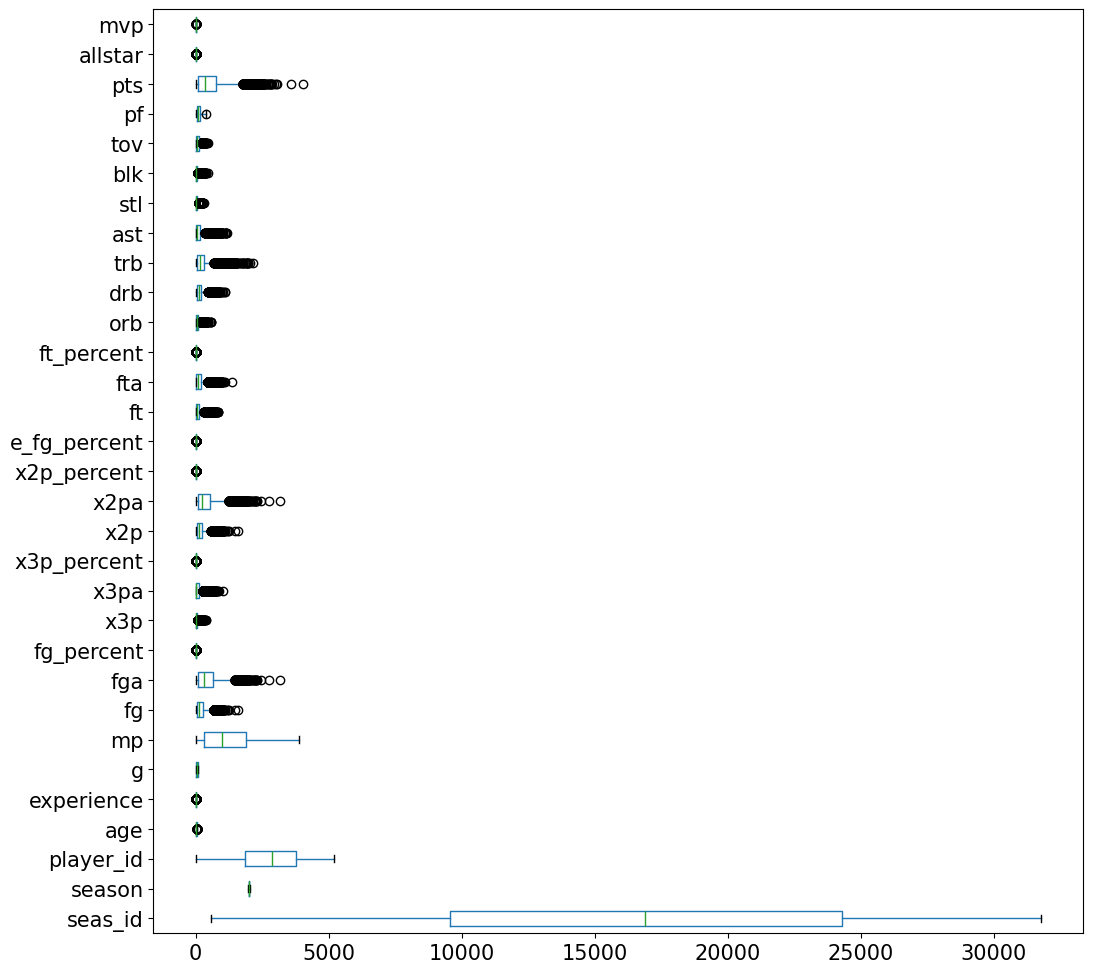

In [84]:
#look for player outliers.  An indicator here of rows with stand out player performance to further investigate.
boxplot_players = players.boxplot(grid=False, vert=False, figsize = (12,12), fontsize=15)
plt.savefig('players_boxplot.png', dpi=300)

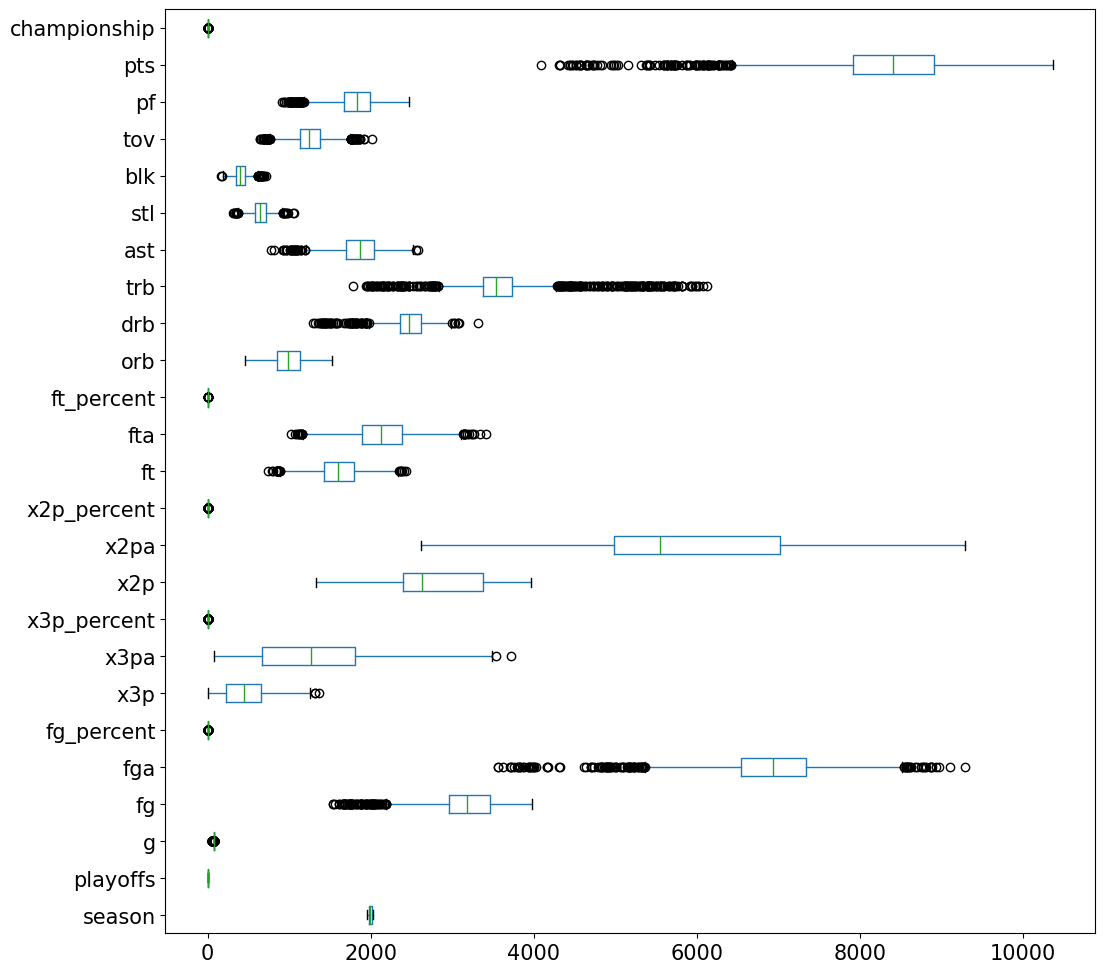

In [85]:
#look for teams outliers.  An indicator here of rows with stand out team performance to further investigate.
boxplot_teams = teams.boxplot(grid=False, vert=False, figsize = (12,12), fontsize=15)
plt.savefig('teams_boxplot.png', dpi=300)

In [86]:
players.dtypes

seas_id           int64
season            int64
player_id         int64
player           object
pos              object
age             float64
experience        int64
lg               object
tm               object
g                 int64
mp              float64
fg                int64
fga               int64
fg_percent      float64
x3p             float64
x3pa            float64
x3p_percent     float64
x2p               int64
x2pa              int64
x2p_percent     float64
e_fg_percent    float64
ft                int64
fta               int64
ft_percent      float64
orb             float64
drb             float64
trb             float64
ast               int64
stl             float64
blk             float64
tov             float64
pf                int64
pts               int64
change           object
decade           object
allstar         float64
mvp             float64
dtype: object

In [87]:
player_drop_list = ['seas_id', 'player_id', 'player', 'pos', 'lg', 'tm', 'change', 'decade']
players_heatmap = players.drop(columns = player_drop_list)

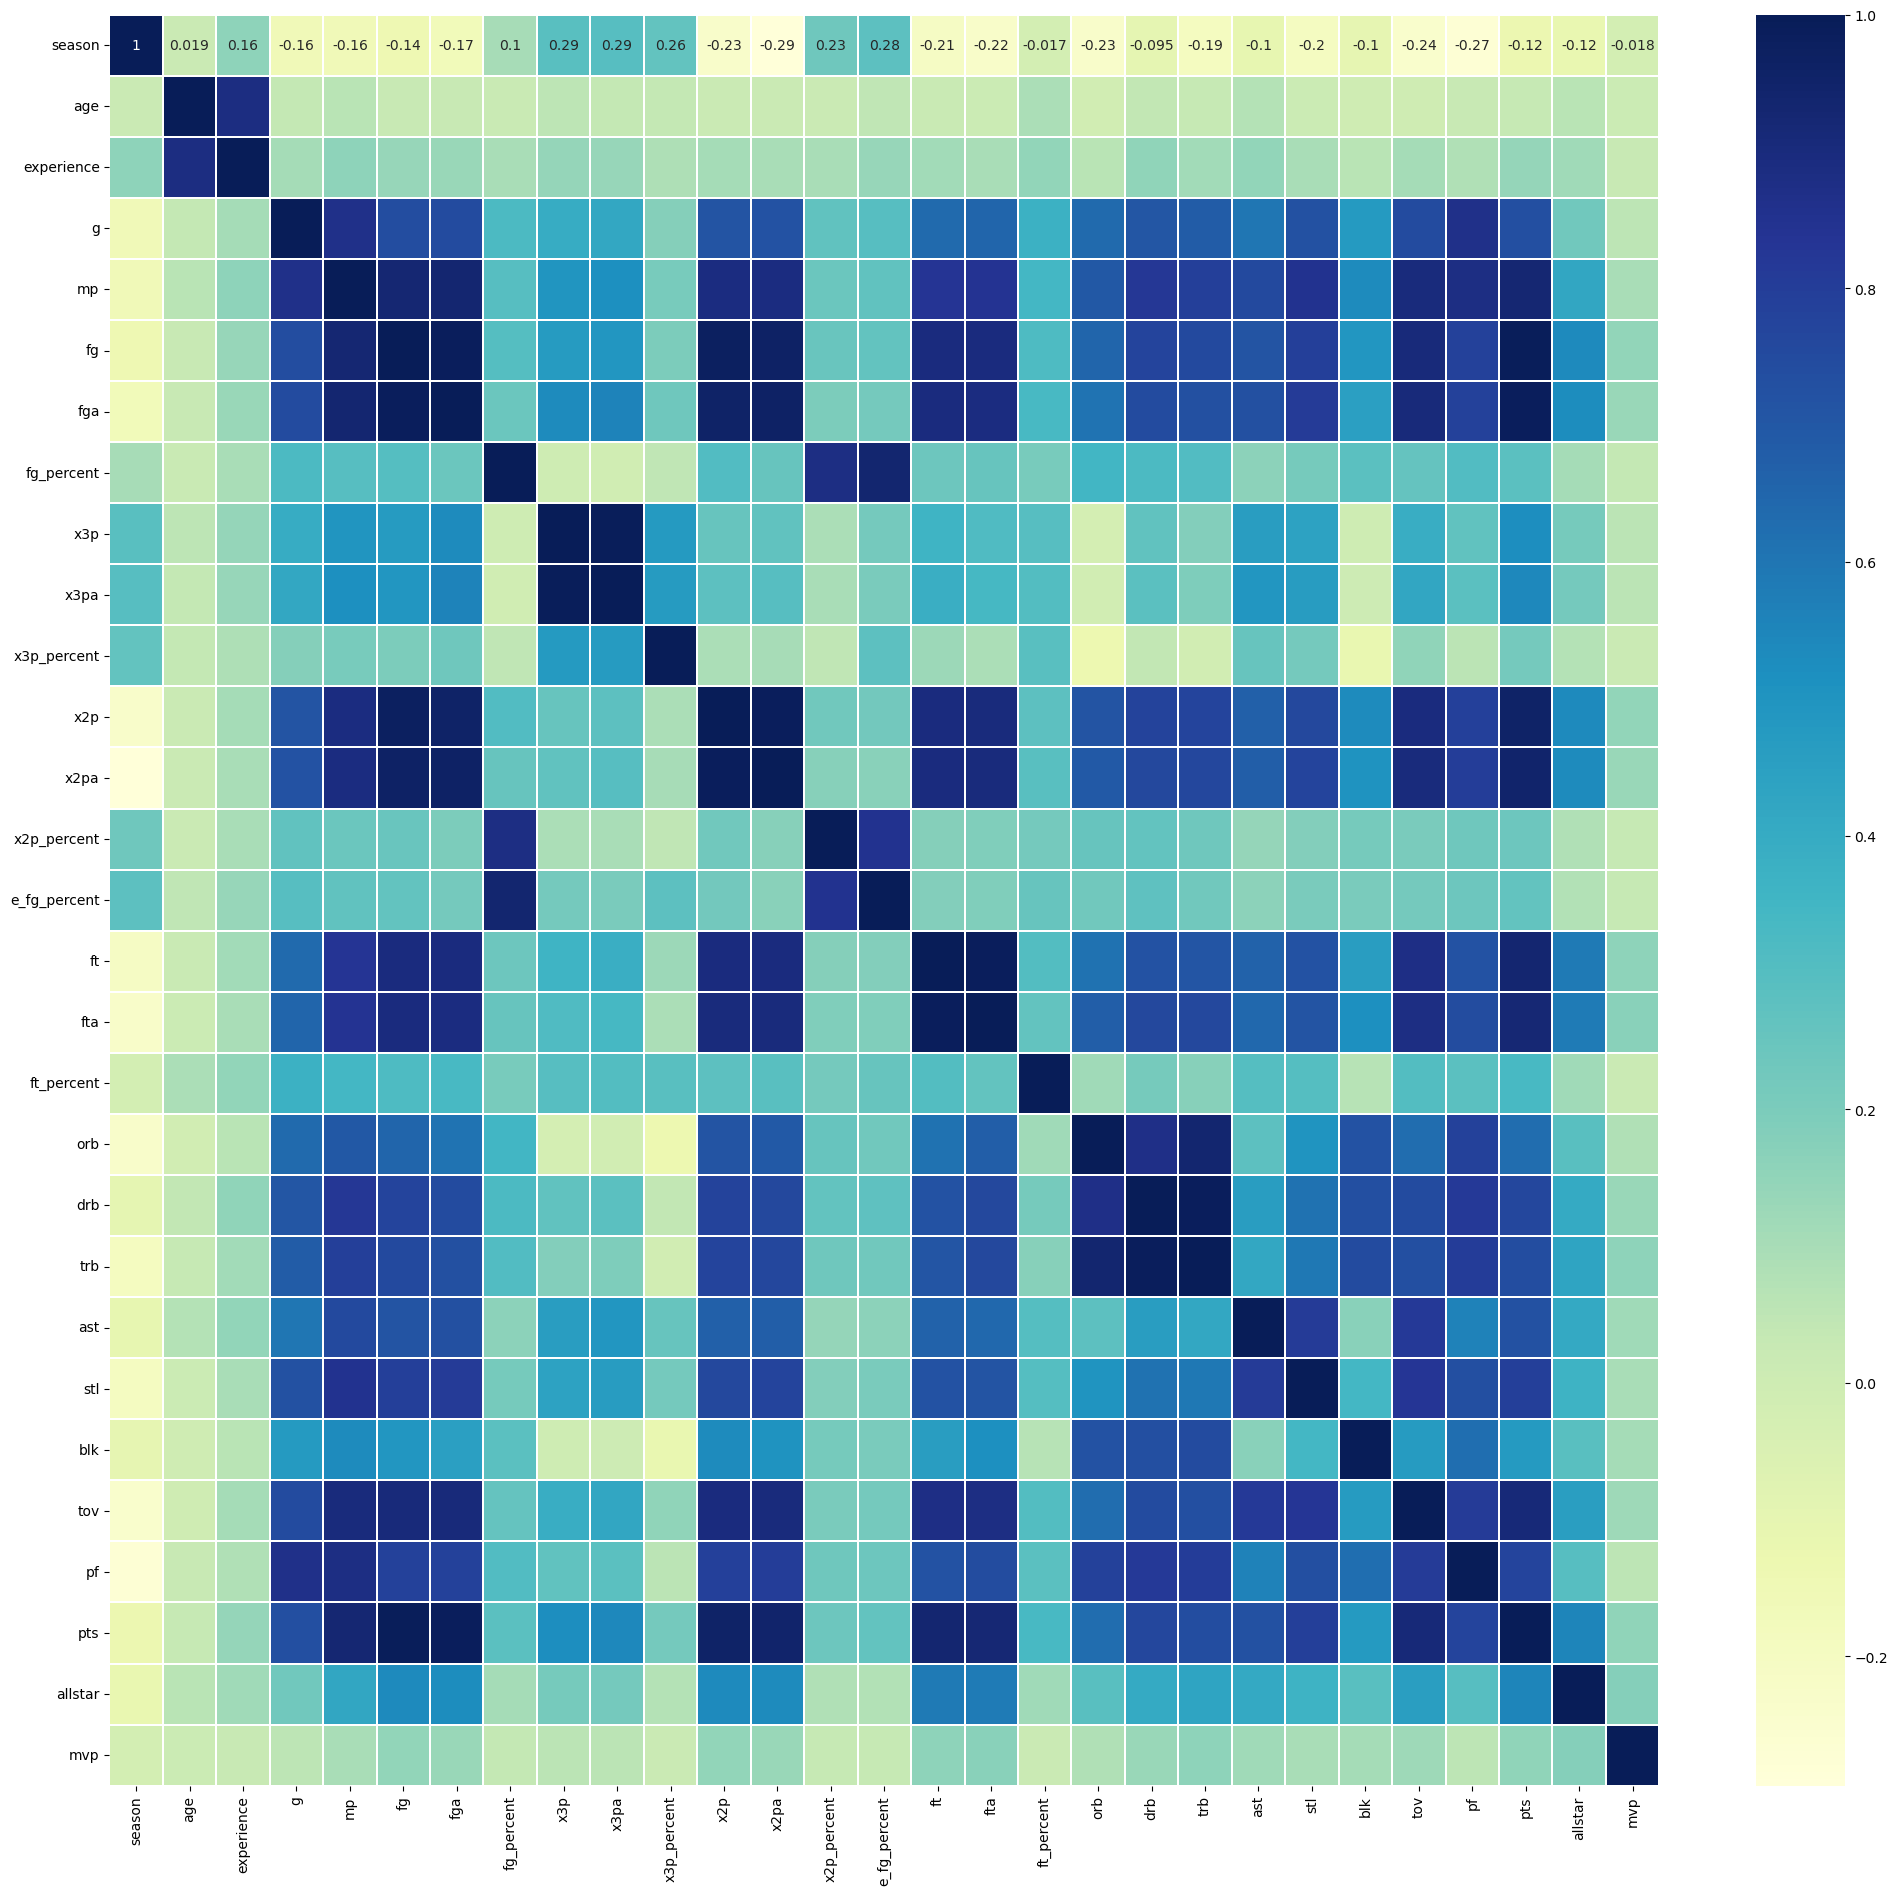

In [88]:
#create players correlation matrix heat map
plt.figure(figsize=(25,23))
sns.heatmap(players_heatmap.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('players_heatmap.png', dpi=300)

In [89]:
teams.dtypes

season            int64
lg               object
team             object
abbreviation     object
playoffs           bool
g               float64
fg              float64
fga             float64
fg_percent      float64
x3p             float64
x3pa            float64
x3p_percent     float64
x2p             float64
x2pa            float64
x2p_percent     float64
ft              float64
fta             float64
ft_percent      float64
orb             float64
drb             float64
trb             float64
ast             float64
stl             float64
blk             float64
tov             float64
pf              float64
pts             float64
change           object
decade           object
championship    float64
dtype: object

In [90]:
team_drop_list = ['lg', 'team', 'abbreviation', 'change', 'decade']
teams_heatmap = teams.drop(columns = team_drop_list)

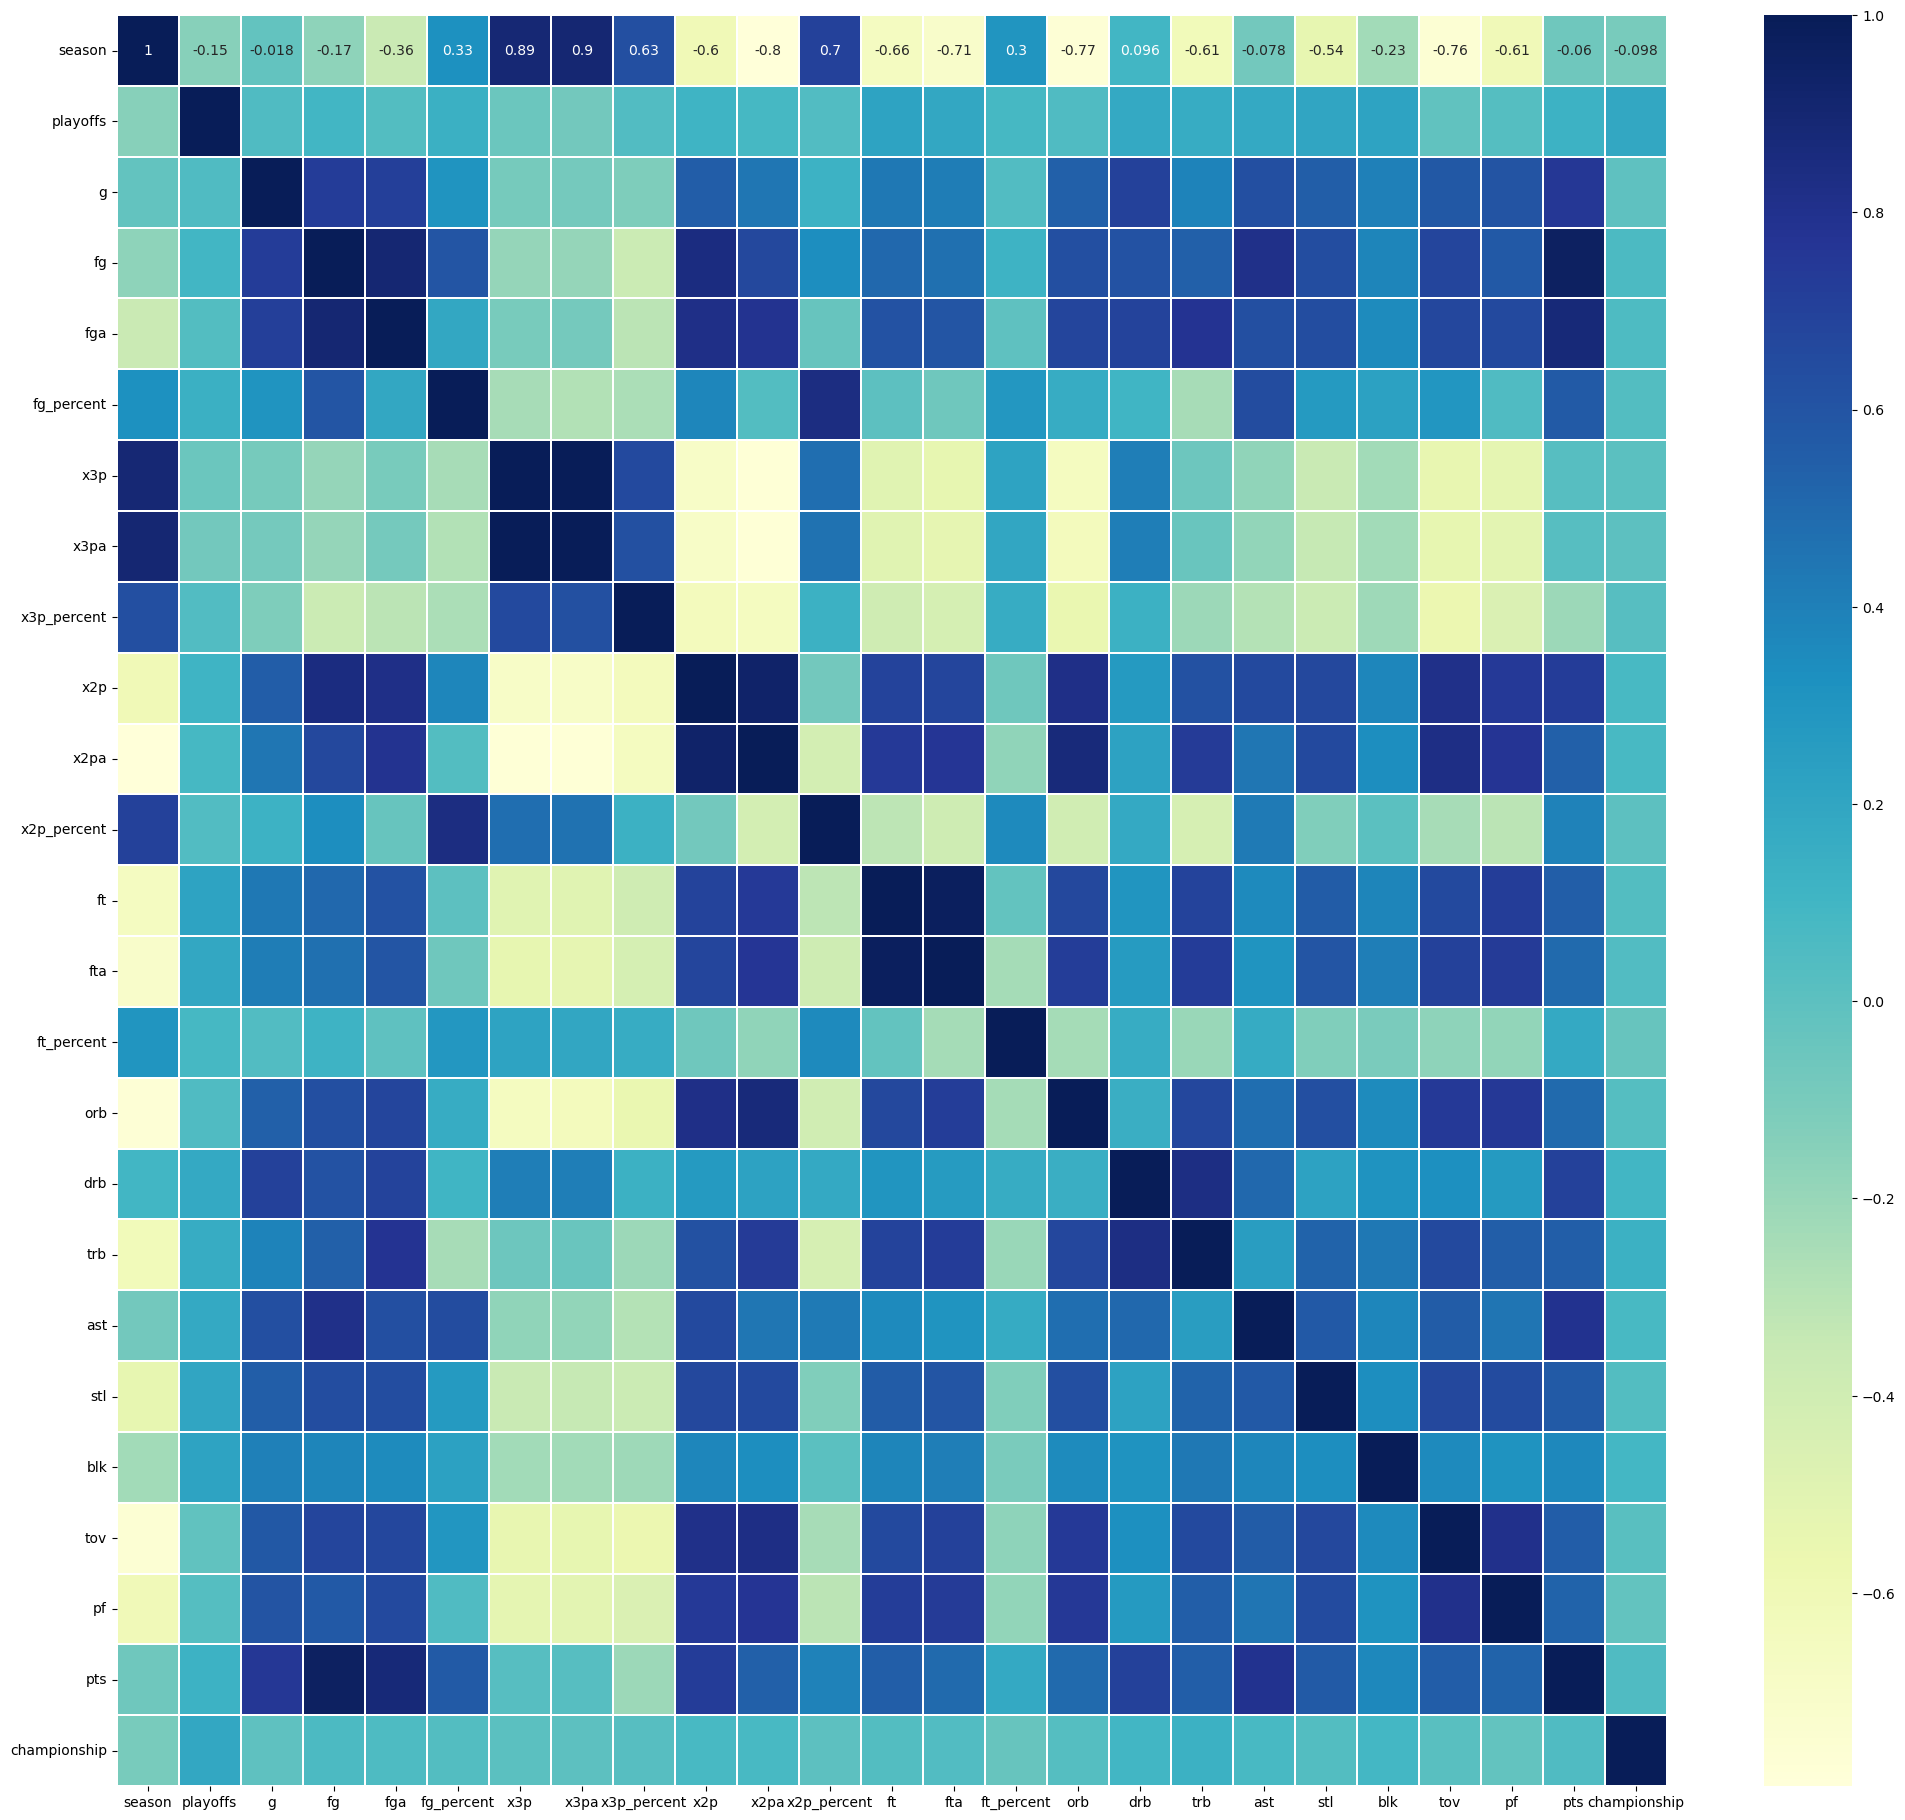

In [91]:
#create teams correlation matrix heat map
plt.figure(figsize=(25,23))
sns.heatmap(teams_heatmap.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('teams_heatmap.png', dpi=300)

In [92]:
#output EDA players and teams data sets for use in next DSM step
players.to_csv('EDA_nba_players.csv', index=False)
teams.to_csv('EDA_nba_teams.csv', index=False) 

In [93]:
#discovered errors in pts column while working presentation in Tableau
#when a player played for more than one team in a season there is a total row that doubles the points.
#for example 1965 for Wilt Chamberlains where he played for two different teams that year.
#players.loc[players['player'] == "Wilt Chamberlain", ['season', 'pts']]

In [94]:
#players.iloc[27426]

In [95]:
#inspectin row 27426 it looks like their is a tm named TOT that sums the total points from all teams played for that year.
#investigate tm value of TOT
#players.loc[players['tm'] == 'TOT'].head()

In [96]:
#it looks like this is the case for tm value TOT.  Before dropping investigate by season for several of the players.
#print(players.loc[players['player'] == 'Alec Burks', ['player', 'tm', 'season', 'pts']])
#print(players.loc[players['player'] == 'Bojan Bogdanović', ['player', 'tm', 'season', 'pts']])
#print(players.loc[players['player'] == 'Bruce Brown', ['player', 'tm', 'season', 'pts']])
#print(players.loc[players['player'] == 'Buddy Hield', ['player', 'tm', 'season', 'pts']])
#print(players.loc[players['player'] == 'Cameron Payne', ['player', 'tm', 'season', 'pts']])

In [97]:
#problem confirmed, drop all rows with tm == TOT to correct.
#confirm and then move this code to beginning of workbook to correct Bokeh plots.
#print(players.shape[0])
#print(players.loc[players['tm'] == 'TOT'].shape[0])
#print(29567-2629)
#players = players[players['tm'] != 'TOT']
#players.shape[0]
#correct number of rows is 26938

In [98]:
#end of EDA.  Transition project now to pre-processing, training data development, and modeling steps.